# **1- Data Preprocessing and Cleaning**

This process involves merging datasets, handling missing values, removing duplicates, and ensuring consistent data types.

## Step 1: Import Necessary Libraries
We will use `pandas` for loading and manipulating the datasets, `NumPy` to facilitate efficient numerical operations on large quantities of data, `plotly express` and `matplotlib` and `seaborn` for visualizations and allows you to create interactive plots with very little code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Step 2: Load Datasets
We have three CSV files: `orders.csv`, `returns.csv`, and `users.csv`. These will be loaded and merged for further analysis.

In [2]:
# Load the datasets (adjust file paths as needed)
orders = pd.read_csv('orders.csv', encoding='ISO-8859-1')
returns = pd.read_csv('returns.csv', encoding='ISO-8859-1')
users = pd.read_csv('users.csv', encoding='ISO-8859-1')

## Step 3: Merge Datasets
We will first merge the `orders` and `returns` datasets using the common column `Region`, then merge the result with the `users` dataset.

In [ ]:
# Merge orders and returns on 'Region'
merged_returns = pd.merge(orders, returns, on='Order ID', how='left')

# Merge the result with users data on 'Region'
merged_users = pd.merge(merged_returns, users, on='Region', how='left')

# Convert merged files to CSV file
merged_returns.to_csv('superstore_sales.csv', index=False)

## Step 4: Data Exploration
Now that we have the merged data, let's explore it to understand its structure, missing values, and any necessary transformations.


In [3]:
# Load the merged dataset
superstore_sales = pd.read_csv('superstore_sales.csv')

In [4]:
# Display the rows of the dataset
superstore_sales

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Status
0,1,3,10/13/2018,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,60035,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,NaN
1,2,6,2/20/2020,Not Specified,2,6.9300,0.01,Regular Air,-4.64,2.08,...,98026,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,NaN
2,3,32,7/15/2019,High,26,2808.0800,0.07,Regular Air,1054.82,107.53,...,98387,Washington,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,NaN
3,4,32,7/15/2019,High,24,1761.4000,0.09,Delivery Truck,-1748.56,70.89,...,98387,Washington,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,NaN
4,5,32,7/15/2019,High,23,160.2335,0.04,Regular Air,-85.13,7.99,...,98387,Washington,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,8395,59971,5/31/2019,Critical,26,437.7700,0.01,Express Air,-125.80,15.98,...,90266,California,West,Home Office,Technology,Computer Peripherals,"Imation 3.5"" DS/HD IBM Formatted Diskettes, 50...",Small Pack,0.64,NaN
8395,8396,59971,5/31/2019,Critical,45,514.8600,0.08,Regular Air,-10.84,12.28,...,90266,California,West,Home Office,Office Supplies,Paper,Xerox 1881,Small Box,0.38,NaN
8396,8397,59971,5/31/2019,Critical,12,356.2700,0.10,Express Air,84.53,30.98,...,90266,California,West,Home Office,Office Supplies,Paper,Xerox 19,Small Box,0.40,NaN
8397,8398,59973,11/15/2019,Low,29,11039.7500,0.06,Delivery Truck,2148.97,400.97,...,70458,Louisiana,South,Small Business,Technology,Office Machines,Epson FX-980 Dot Matrix Printer,Jumbo Drum,0.59,NaN


In [5]:
# Display the dataset information
superstore_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Order Priority        8399 non-null   object 
 4   Order Quantity        8399 non-null   int64  
 5   Sales                 8399 non-null   float64
 6   Discount              8399 non-null   float64
 7   Ship Mode             8399 non-null   object 
 8   Profit                8399 non-null   float64
 9   Unit Price            8399 non-null   float64
 10  Shipping Cost         8399 non-null   float64
 11  Customer Name         8399 non-null   object 
 12  City                  8399 non-null   object 
 13  Zip Code              8399 non-null   int64  
 14  State                 8399 non-null   object 
 15  Region               

In [6]:
# Check for null values in the dataset
superstore_sales.isnull().sum()

Row ID                     0
Order ID                   0
Order Date                 0
Order Priority             0
Order Quantity             0
Sales                      0
Discount                   0
Ship Mode                  0
Profit                     0
Unit Price                 0
Shipping Cost              0
Customer Name              0
City                       0
Zip Code                   0
State                      0
Region                     0
Customer Segment           0
Product Category           0
Product Sub-Category       0
Product Name               0
Product Container          0
Product Base Margin       63
Status                  7527
dtype: int64

In [7]:
# Check for duplicates in the dataset
superstore_sales.duplicated().sum()

np.int64(0)

In [8]:
# Display summary statistics of the dataset
superstore_sales.describe(include='all')

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Status
count,8399.000000,8399.000000,8399,8399,8399.000000,8399.000000,8399.000000,8399,8399.000000,8399.000000,...,8399.000000,8399,8399,8399,8399,8399,8399,8399,8336.000000,872
unique,NaN,NaN,1418,5,NaN,NaN,NaN,3,NaN,NaN,...,NaN,48,4,4,3,17,1263,7,NaN,1
top,NaN,NaN,9/15/2019,High,NaN,NaN,NaN,Regular Air,NaN,NaN,...,NaN,California,Central,Corporate,Office Supplies,Paper,"Global High-Back Leather Tilter, Burgundy",Small Box,NaN,Returned
freq,NaN,NaN,20,1768,NaN,NaN,NaN,6270,NaN,NaN,...,NaN,780,2710,3076,4610,1225,24,4347,NaN,872
mean,4200.000000,29965.179783,NaN,NaN,25.571735,1775.878179,0.049671,NaN,181.184424,89.346259,...,52839.139421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.512513,NaN
std,2424.726789,17260.883447,NaN,NaN,14.481071,3585.050525,0.031823,NaN,1196.653371,290.354383,...,28509.535635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135589,NaN
min,1.000000,3.000000,NaN,NaN,1.000000,2.240000,0.000000,NaN,-14140.700000,0.990000,...,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350000,NaN
25%,2100.500000,15011.500000,NaN,NaN,13.000000,143.195000,0.020000,NaN,-83.315000,6.480000,...,30337.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.380000,NaN
50%,4200.000000,29857.000000,NaN,NaN,26.000000,449.420000,0.050000,NaN,-1.500000,20.990000,...,52732.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520000,NaN
75%,6299.500000,44596.000000,NaN,NaN,38.000000,1709.320000,0.080000,NaN,162.750000,85.990000,...,77577.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590000,NaN


In [9]:
def detect_outliers_iqr(superstore_sales, column):
    Q1 = superstore_sales[column].quantile(0.25)  # First quartile
    Q3 = superstore_sales[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = superstore_sales[(superstore_sales[column] < lower_bound) | (superstore_sales[column] > upper_bound)]
    return outliers

# Example: detecting outliers in Sales, Shipping Cost, Unit Price
sales_outliers = detect_outliers_iqr(superstore_sales, 'Sales')
shipping_outliers = detect_outliers_iqr(superstore_sales, 'Shipping Cost')
price_outliers = detect_outliers_iqr(superstore_sales, 'Unit Price')
discount_outliers = detect_outliers_iqr(superstore_sales, 'Discount')
profit_outliers = detect_outliers_iqr(superstore_sales, 'Profit')

# Display number of outliers
print(f"Sales outliers: {len(sales_outliers)}")
print(f"Shipping Cost outliers: {len(shipping_outliers)}")
print(f"Unit Price outliers: {len(price_outliers)}")
print(f"Discount outliers: {len(discount_outliers)}")
print(f"Profit outliers: {len(profit_outliers)}")

Sales outliers: 1042
Shipping Cost outliers: 972
Unit Price outliers: 848
Discount outliers: 3
Profit outliers: 1704


### Data Exploration Results:
1. The dataset has `33596` rows and `24` columns .
2. There may be numerical features like sales amounts and categorical features like regions, product categories, etc.
3. The `Order Date` column are in object format and will require conversion to `datetime` format for further analysis.
4. we have 2 columns with missing values and it is `Product Base Margin` column, which has 63 missing values and we will fill it with `?` sign and `Status` column and we will fill missing cells with Sold.
5. We have no duplicated values
6. We have Outliears in Sales, Profit, Shipping Cost and Profit columns

## Step 4: Data Cleaning and Preprocessing
Based on our exploration, we will now handle missing values, convert date columns to proper formats, and ensure there are no duplicates.

In [10]:
# Handling missing values by filling missing Postal Code values with '?'
superstore_sales['Product Base Margin'] = superstore_sales['Product Base Margin'].fillna(0)
superstore_sales['Status'] = superstore_sales['Status'].fillna('Sold')

In [11]:
# Convert 'Order Date' and 'Ship Date' to datetime format if they exist
superstore_sales['Order Date'] = pd.to_datetime(superstore_sales['Order Date'], errors='coerce')

In [12]:
# Check if cleaning was successful
superstore_sales.isnull().sum()

Row ID                  0
Order ID                0
Order Date              0
Order Priority          0
Order Quantity          0
Sales                   0
Discount                0
Ship Mode               0
Profit                  0
Unit Price              0
Shipping Cost           0
Customer Name           0
City                    0
Zip Code                0
State                   0
Region                  0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Name            0
Product Container       0
Product Base Margin     0
Status                  0
dtype: int64

In [13]:
# Check for duplicates in the cleaned dataset
superstore_sales.duplicated().sum()

np.int64(0)

In [14]:
# Display the cleaned dataset information
superstore_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   datetime64[ns]
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   int64         
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  City                  8399 non-null   object        
 13  Zip Code          

In [15]:
superstore_sales

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Status
0,1,3,2018-10-13,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,60035,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,Sold
1,2,6,2020-02-20,Not Specified,2,6.9300,0.01,Regular Air,-4.64,2.08,...,98026,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,Sold
2,3,32,2019-07-15,High,26,2808.0800,0.07,Regular Air,1054.82,107.53,...,98387,Washington,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,Sold
3,4,32,2019-07-15,High,24,1761.4000,0.09,Delivery Truck,-1748.56,70.89,...,98387,Washington,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,Sold
4,5,32,2019-07-15,High,23,160.2335,0.04,Regular Air,-85.13,7.99,...,98387,Washington,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,8395,59971,2019-05-31,Critical,26,437.7700,0.01,Express Air,-125.80,15.98,...,90266,California,West,Home Office,Technology,Computer Peripherals,"Imation 3.5"" DS/HD IBM Formatted Diskettes, 50...",Small Pack,0.64,Sold
8395,8396,59971,2019-05-31,Critical,45,514.8600,0.08,Regular Air,-10.84,12.28,...,90266,California,West,Home Office,Office Supplies,Paper,Xerox 1881,Small Box,0.38,Sold
8396,8397,59971,2019-05-31,Critical,12,356.2700,0.10,Express Air,84.53,30.98,...,90266,California,West,Home Office,Office Supplies,Paper,Xerox 19,Small Box,0.40,Sold
8397,8398,59973,2019-11-15,Low,29,11039.7500,0.06,Delivery Truck,2148.97,400.97,...,70458,Louisiana,South,Small Business,Technology,Office Machines,Epson FX-980 Dot Matrix Printer,Jumbo Drum,0.59,Sold


# Step 5: Outliers in Sales and Profit

Let's create box plots for Sales and Profit to visualize any outliers. These box plots will show us the spread of the data, with the potential outliers displayed as points outside the whiskers.

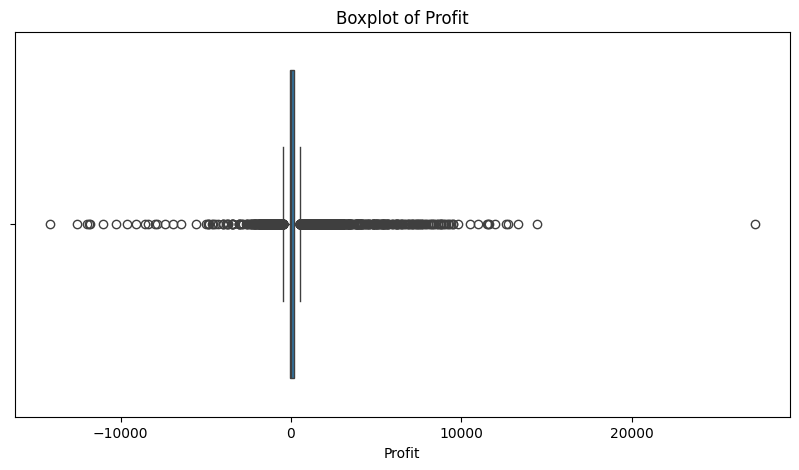

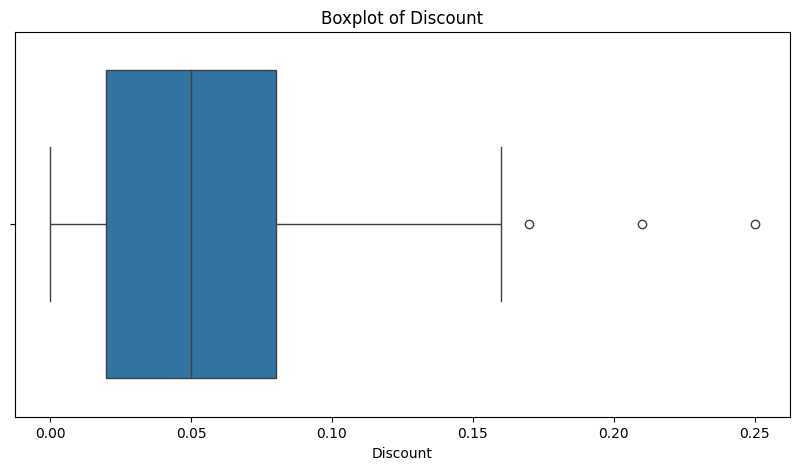

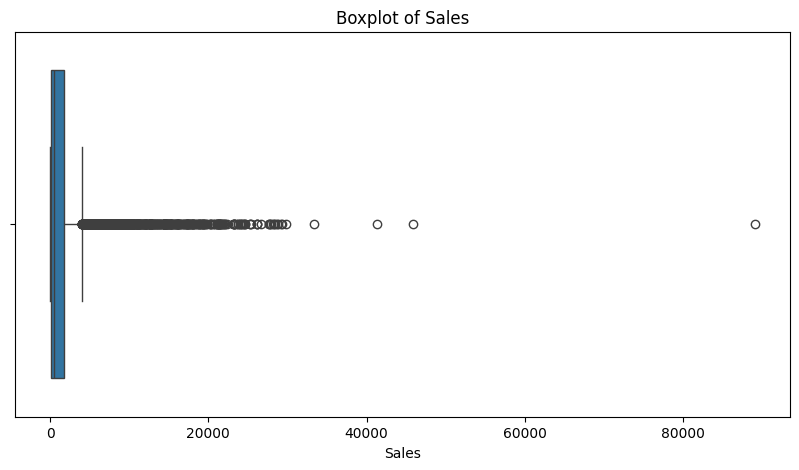

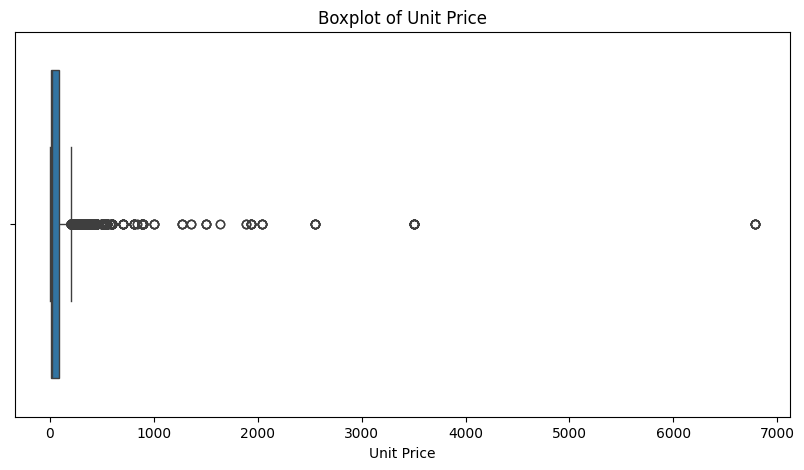

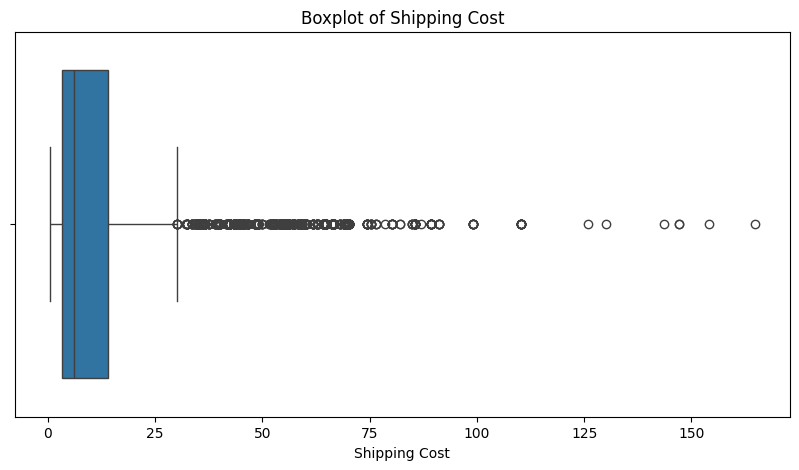

In [16]:
autoclean_outliers_columns = superstore_sales[['Profit','Discount','Sales','Unit Price','Shipping Cost']]

# Create a boxplot for each numerical feature
for col in autoclean_outliers_columns:
    plt.figure(figsize=(10, 5))  
    sns.boxplot(x=superstore_sales[col])       
    plt.title(f'Boxplot of {col}') 
    plt.show() 

# Save dataset after cleaning as CSV file

In [17]:
superstore_sales.to_csv("cleaned_superstore_sales.csv", index=False)

The dataset is now cleaned and ready for further analysis.

# **2- Data Analysis Questions**
We will outline key analysis questions that can be derived from the dataset. These questions will provide valuable insights for decision-makers and help guide future analyses, such as understanding product performance, sales trends, and regional performance.

**1. Sales Performance Analysis Questions**


1- What are the trends in sales performance over time (monthly, quarterly, yearly)?

2- How do different seasons or holiday periods affect sales trends?

3- How does each product category contribute to overall sales?

4- Which regions or cities have the highest and lowest sales performance?

5- Slaes over both regoins and years

6- What is the impact of discounts on sales volume and revenue?

**2. Customer Behavior Questions:**

1- What are the top customer segments by total sales or frequency of purchases?

2- What are the customer retention rates across different regions?

3- What is the estimated customer lifetime value across different segments?

4- Which customers are likely to stop purchasing based on purchase frequency?

**3. Product Category Analysis Questions**

1- Which product categories generate the most revenue?

2- How do different product categories perform in different regions?

3- What are the stock levels across different product categories and locations?

4- How quickly are products selling out, and which categories have faster turnover?

5- What is the relationship between product price and sales volume?

**4. Profitability Questions:**

1- Which regions or product categories have the highest profit margins?

2- How do shipping costs affect profitability across different regions?

3- Are there any specific customer segments that contribute to higher profitability?

4- the relation between profit and discount

5- profit over years

6- Profit over both regoins and years

7- The highest and the lowest five product based on profit 

8- The relation between shipping mode and profit 

9- the relation between Unit price and Profit

10- The affect of container size on Shipment Cost and Profit Amount

11- who is the top and low five customer based on sales and profit that the company may target to improve preformance

**5. Losses analysis**

questions:

1-what is the losses of each status?

2-which mode lose the most?

3-which priority lose the most?

4-which container lose the most?

5-which segment lose the most?

6-which region lose the most?

7-which category lose the most?

8-which subcategory loses the most?

**6. Returning questions**

questions:

1-how many orders are returned concerned to the sold ones?

2-is the problem in a certain ship mode?

3-is the problem in a certain Category?

4-is the problem in a certain SubCategory?

5-what are the top Products returned?

6-is the problem in a certain Region?

7-is the problem in a certain Customer segment?

8-who are the most customer returning orders?

9-is the problem in a certain container?

10-is the problem in a certain priority?



# **3- Forecasting Questions Phase**
We will determine a set of forecasting questions and answer them using the trends found in the given dataset.

**1. Sales Performance Analysis Questions**


1- What are the trends in sales performance over time (monthly, quarterly, yearly)?

2- How do different seasons or holiday periods affect sales trends?

3- How does each product category contribute to overall sales?

4- Which regions or cities have the highest and lowest sales performance?

5- Slaes over both regoins and years

6- What is the impact of discounts on sales volume and revenue?

1- Sales Trends Over Time

To analyze sales trends over time, we will group the sales data by year, quarter, and month.

<Axes: title={'center': 'Monthly Sales Trends Over the Years'}, xlabel='Year'>

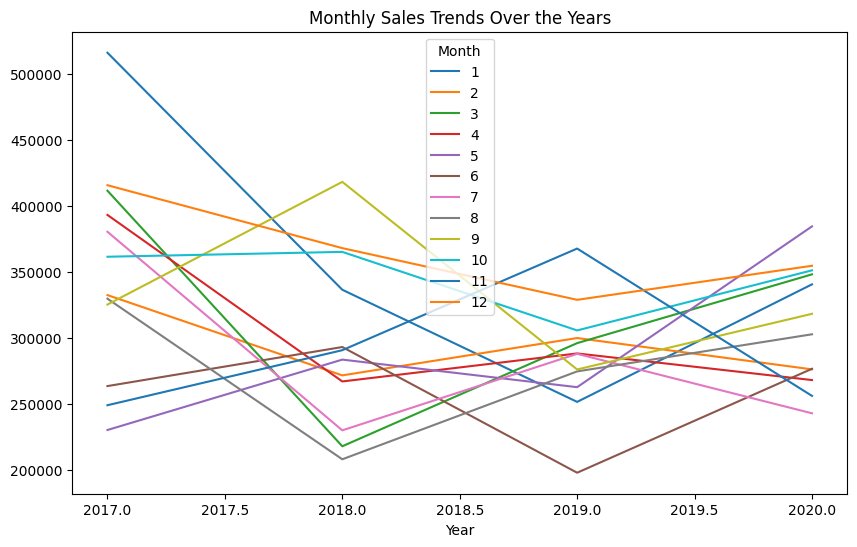

In [18]:
# Extract year and month from the 'Order Date' column
superstore_sales['Year'] = pd.to_datetime(superstore_sales['Order Date']).dt.year
superstore_sales['Month'] = pd.to_datetime(superstore_sales['Order Date']).dt.month
superstore_sales['Quarter'] = pd.to_datetime(superstore_sales['Order Date']).dt.quarter


sales_trends = superstore_sales.groupby(['Year', 'Month'])['Sales'].sum().unstack()
sales_trends.plot(kind='line', title='Monthly Sales Trends Over the Years', figsize=(10, 6))

2- How do different seasons or holiday periods affect sales trends

<Axes: title={'center': 'Average Monthly Sales'}, xlabel='Month', ylabel='Sales'>

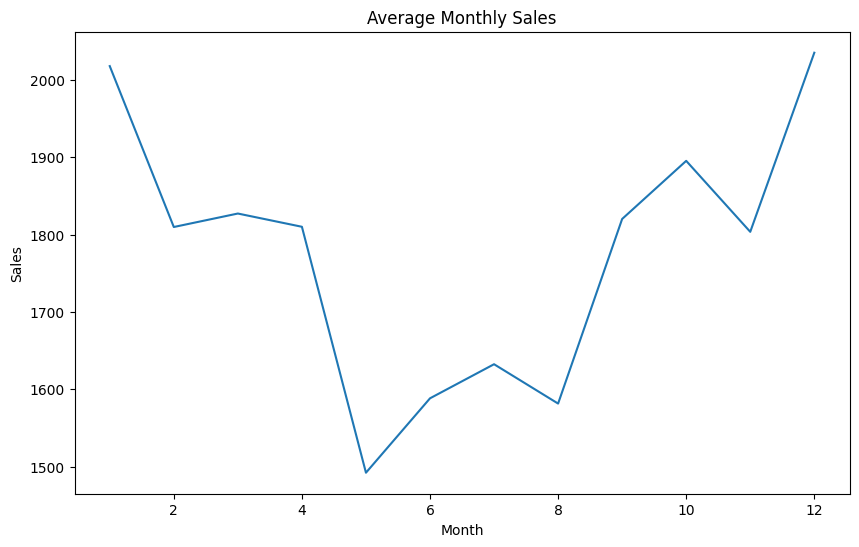

In [19]:
# Extract the month and day from the 'Order Date' column
superstore_sales['Month'] = superstore_sales['Order Date'].dt.month
superstore_sales['Day'] = superstore_sales['Order Date'].dt.day

# Analyze average monthly sales to identify seasonality patterns
monthly_sales = superstore_sales.groupby('Month')['Sales'].mean()
monthly_sales.plot(kind='line', title='Average Monthly Sales', xlabel='Month', ylabel='Sales', figsize=(10, 6))

3- Product Category Contribution to Sales

<Axes: title={'center': 'Total Sales by Product Category'}, xlabel='Product Category'>

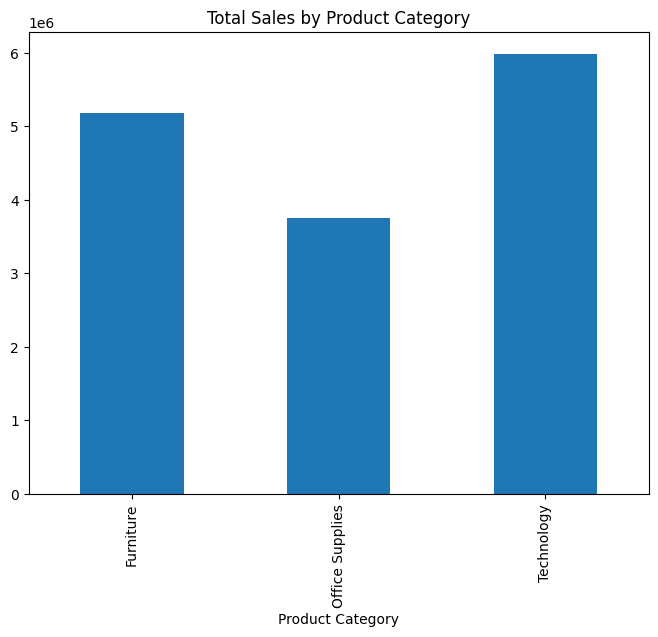

In [20]:
category_sales = superstore_sales.groupby('Product Category')['Sales'].sum()
category_sales.plot(kind='bar', title='Total Sales by Product Category', figsize=(8, 6))


The Sales of each Product category in every years

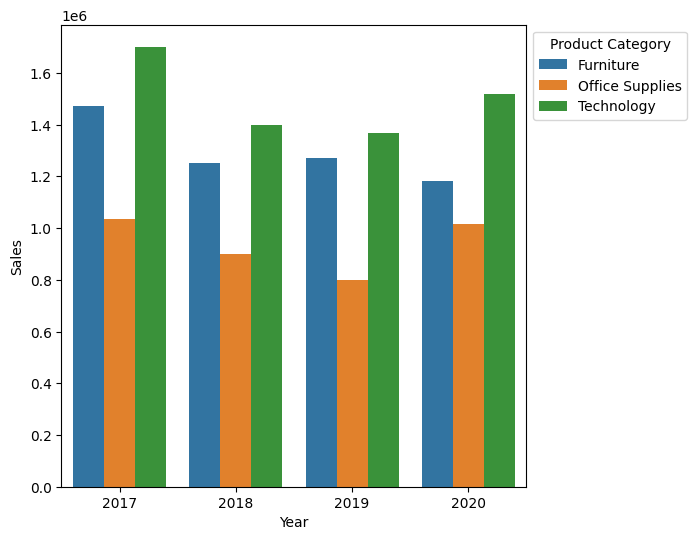

In [21]:
#The top Product category based on Sales
ProductCategorySalesOverYears = superstore_sales.groupby(['Year','Product Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data = ProductCategorySalesOverYears, x ='Year', y='Sales',hue='Product Category')

plt.legend(title='Product Category', loc = 'best',bbox_to_anchor=(1,1))
plt.show()

The top product sub-category over all years based on Sales is Telephones and communications and the lowest is rubber bands

The Sales of each Product category in every years and Region

<Axes: title={'center': 'Product Category Sales by Region'}, xlabel='Year,Region'>

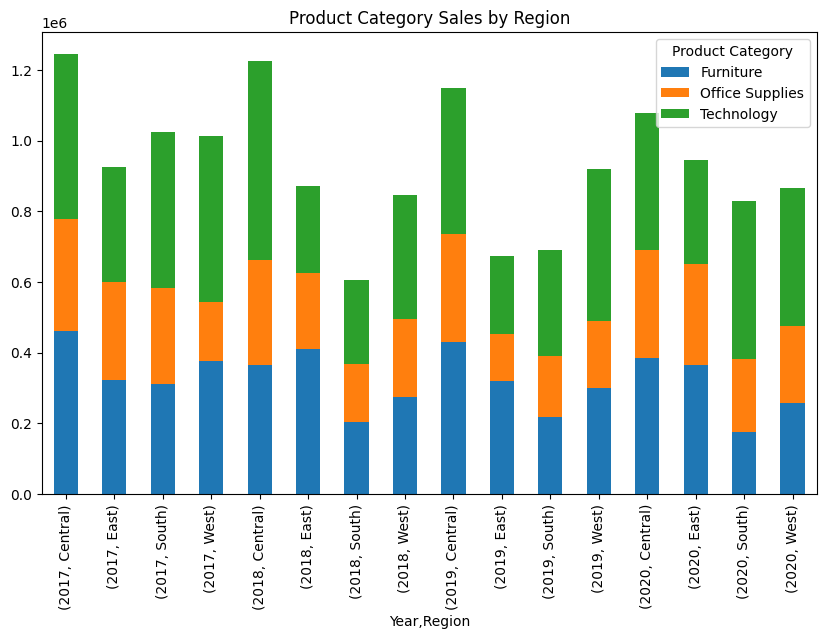

In [22]:
region_category_sales = superstore_sales.groupby(['Year', 'Region', 'Product Category'])['Sales'].sum().unstack()
region_category_sales.plot(kind='bar', stacked=True, title='Product Category Sales by Region', figsize=(10, 6))

The Sales of each Product sub-category in every years and Region

In [23]:
# Grouping data by year and product sub-category to calculate total sales
ProductSalesOverYears = superstore_sales.groupby(['Year', 'Product Sub-Category'])['Sales'].sum().reset_index()

# Creating an interactive bar chart
fig = px.bar(ProductSalesOverYears, 
             x='Year', 
             y='Sales', 
             color='Product Sub-Category', 
             title='Top Product based on Sales',
             labels={'Year': 'Year', 'Sales': 'Total Sales'},
             barmode='group',  # Shows bars for each category side by side
             height=600,  # Adjust the height of the figure
             width=800)  # Adjust the width of the figure

# Update the layout to position the legend outside the plot
fig.update_layout(legend=dict(
    title='Product Sub-Category',
    x=1,  # Position it outside the plot area on the x-axis
    y=1,
    traceorder='normal'
))

# Show the interactive plot
fig.show()


4- Regional Sales Performance

<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

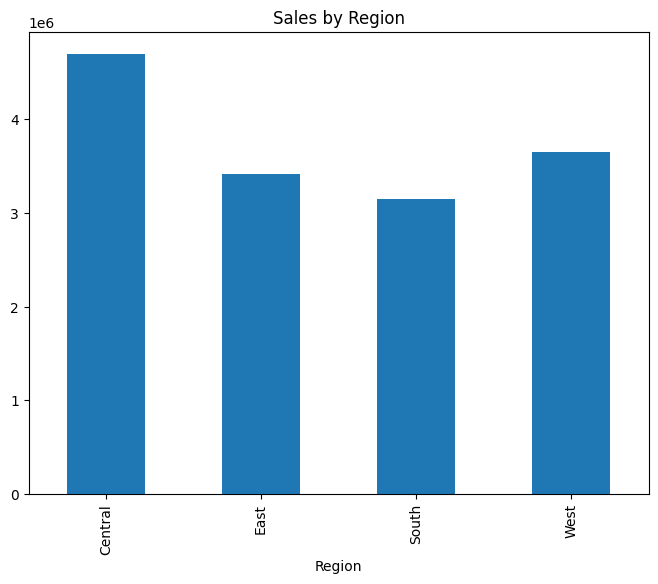

In [24]:
region_sales = superstore_sales.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', title='Sales by Region', figsize=(8, 6))

5- Slaes over both regoins and years

In [25]:
SalesByYearsAndRegion = superstore_sales.groupby(['Year','Region'])['Sales'].sum().reset_index()
print(SalesByYearsAndRegion)

    Year   Region         Sales
0   2017  Central  1.245107e+06
1   2017     East  9.255578e+05
2   2017    South  1.024364e+06
3   2017     West  1.014111e+06
4   2018  Central  1.225024e+06
5   2018     East  8.725294e+05
6   2018    South  6.049033e+05
7   2018     West  8.472239e+05
8   2019  Central  1.150174e+06
9   2019     East  6.740721e+05
10  2019    South  6.914181e+05
11  2019     West  9.211529e+05
12  2020  Central  1.078862e+06
13  2020     East  9.443072e+05
14  2020    South  8.295343e+05
15  2020     West  8.672603e+05


<Figure size 640x480 with 0 Axes>

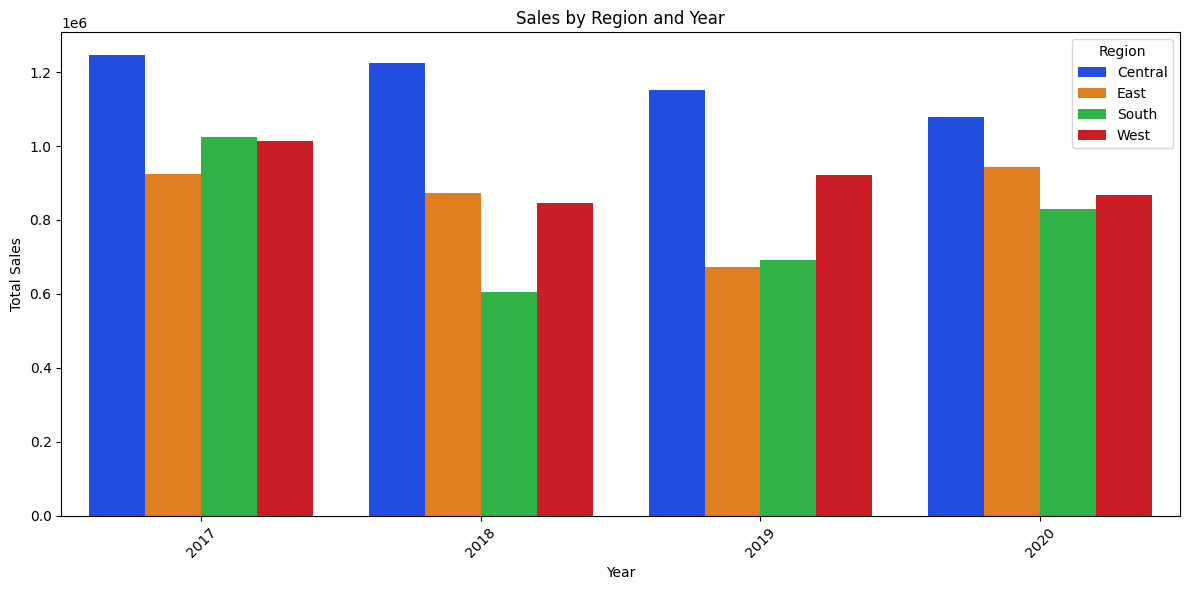

In [26]:
plt.clf()
plt.figure(figsize=(12, 6))
sns.set_palette('bright')  
sns.barplot(data=SalesByYearsAndRegion, x='Year', y='Sales', hue='Region')
plt.title('Sales by Region and Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

Central had the hieghts Sales over years

6- Impact of Discounts on Sales

<Axes: title={'center': 'Impact of Discounts on Sales'}>

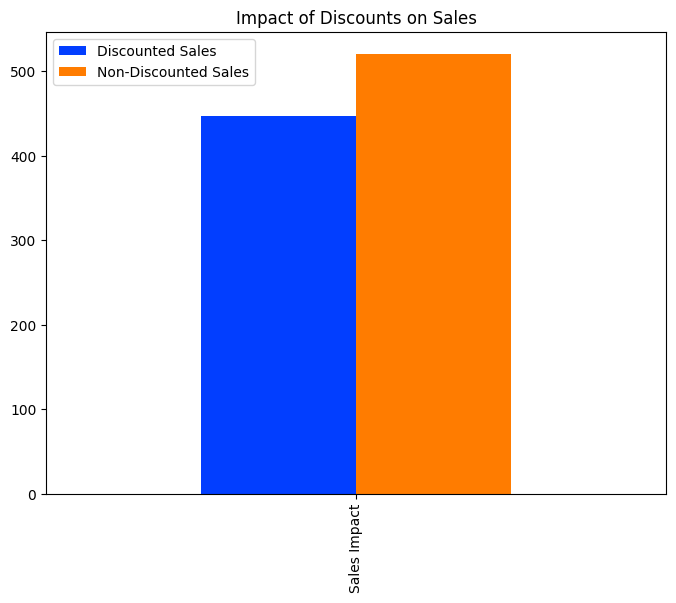

In [27]:
discount_sales = superstore_sales[superstore_sales['Discount'] > 0]
no_discount_sales = superstore_sales[superstore_sales['Discount'] == 0]

# Compare average sales with and without discounts
discount_impact = pd.DataFrame({
    'Discounted Sales': discount_sales['Sales'].median(),
    'Non-Discounted Sales': no_discount_sales['Sales'].median()
}, index=['Sales Impact'])

discount_impact.plot(kind='bar', title='Impact of Discounts on Sales', figsize=(8, 6))

the corelation between sales and discount

In [28]:
correlation = superstore_sales['Discount'].corr(superstore_sales['Sales'])
print(f'Correlation between Discount and Profit: {correlation}')

Correlation between Discount and Profit: -0.019686336285171663


there is no correlation between Discount and Sales.

**2. Customer Behavior Questions:**

1- What are the top customer segments by total sales or frequency of purchases?

2- What are the customer retention rates across different regions?

3- What is the estimated customer lifetime value across different segments?

4- Which customers are likely to stop purchasing based on purchase frequency?

1- Top Customer Segments by Total Sales

<Axes: title={'center': 'Total Sales by Customer Segment'}, xlabel='Customer Segment'>

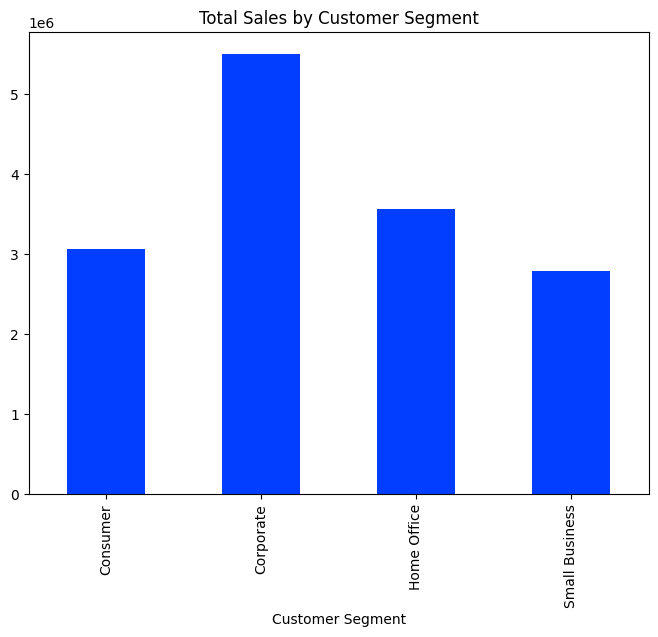

In [29]:
segment_sales = superstore_sales.groupby('Customer Segment')['Sales'].sum()
segment_sales.plot(kind='bar', title='Total Sales by Customer Segment', figsize=(8, 6))

2- Customer Retention by Region

<Axes: title={'center': 'Customer Retention by Region'}, xlabel='Region'>

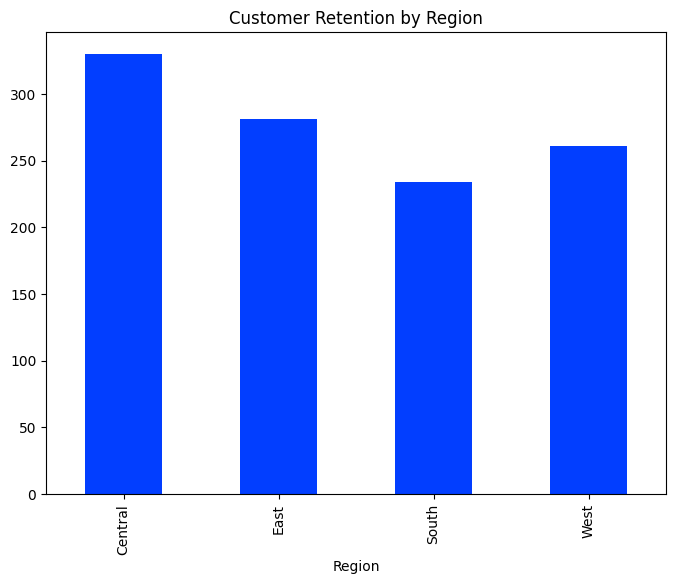

In [30]:
retention_by_region = superstore_sales.groupby('Region')['Customer Name'].nunique()
retention_by_region.plot(kind='bar', title='Customer Retention by Region', figsize=(8, 6))

3- Estimated customer lifetime value across different segments

In [31]:
# Calculate the total sales and number of purchases for each customer
customer_sales = superstore_sales.groupby('Customer Name')['Sales'].sum()
customer_freq = superstore_sales.groupby('Customer Name')['Order ID'].count()

# Estimate Customer Lifetime Value (CLV)
# Assuming a simple CLV calculation: CLV = Avg. Purchase Value * Purchase Frequency
avg_purchase_value = customer_sales / customer_freq
clv = avg_purchase_value * customer_freq

# Display the top 10 customers by CLV
top_customers_clv = clv.sort_values(ascending=False).head(10)
top_customers_clv

Customer Name
Emily Phan           117124.4380
Deborah Brumfield     97433.1355
Roy Skaria            92542.1530
Sylvia Foulston       88875.7575
Grant Carroll         88417.0025
Alejandro Grove       83561.9300
Darren Budd           81577.3435
Julia Barnett         80044.4520
John Lucas            79696.1875
Liz MacKendrick       76306.4315
dtype: float64

4- Identify customers with long gaps between purchases

In [32]:
# Calculate the average days between orders for each customer
superstore_sales['Order Date'] = pd.to_datetime(superstore_sales['Order Date'])
customer_dates = superstore_sales.groupby('Customer Name')['Order Date'].agg(['min', 'max', 'count'])
customer_dates['days_between'] = (customer_dates['max'] - customer_dates['min']).dt.days / customer_dates['count']

# Display customers with high average days between purchases
high_churn_risk = customer_dates[customer_dates['days_between'] > customer_dates['days_between'].quantile(0.75)]
high_churn_risk

,min,max,count,days_between
Customer Name,,,,
Adrian Hane,2018-07-03,2020-06-12,4,177.500000
Adrian Shami,2017-11-10,2020-11-26,6,185.333333
Alan Dominguez,2017-07-28,2020-02-19,6,156.000000
Alex Russell,2017-01-03,2020-12-26,10,145.300000
Allen Armold,2017-10-09,2020-08-30,7,150.857143
...,...,...,...,...
Valerie Dominguez,2017-01-05,2020-08-17,9,146.666667
Vicky Freymann,2017-02-13,2020-08-30,9,143.777778
Victor Price,2017-01-06,2020-06-24,6,210.833333


3. Product Category Analysis

Questions:

1- Which product categories generate the most revenue?

2- How do different product categories perform in different regions?

3- What are the stock levels across different product categories and locations?

4- How quickly are products selling out, and which categories have faster turnover?

5- What is the relationship between product price and sales volume?

1- Top Revenue Categories

<Axes: title={'center': 'Revenue by Product Category'}, xlabel='Product Category'>

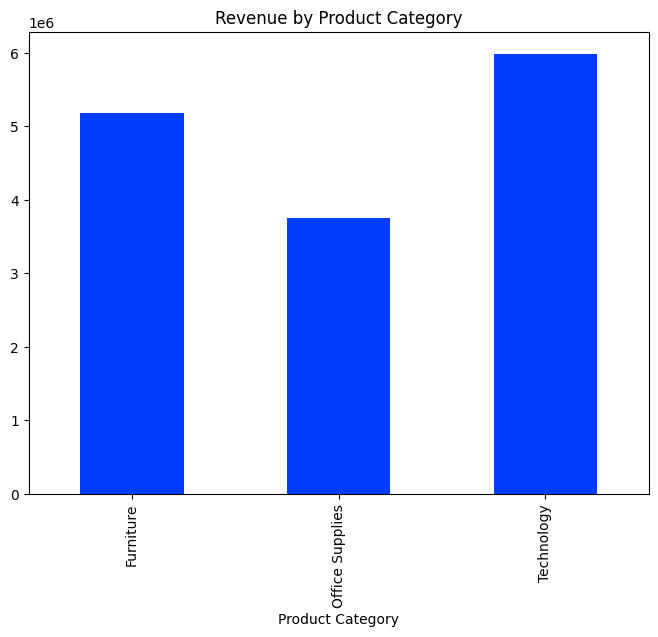

In [33]:
category_revenue = superstore_sales.groupby('Product Category')['Sales'].sum()
category_revenue.plot(kind='bar', title='Revenue by Product Category', figsize=(8, 6))

2- Product Category Performance by Region

<Axes: title={'center': 'Product Category Sales by Region'}, xlabel='Region'>

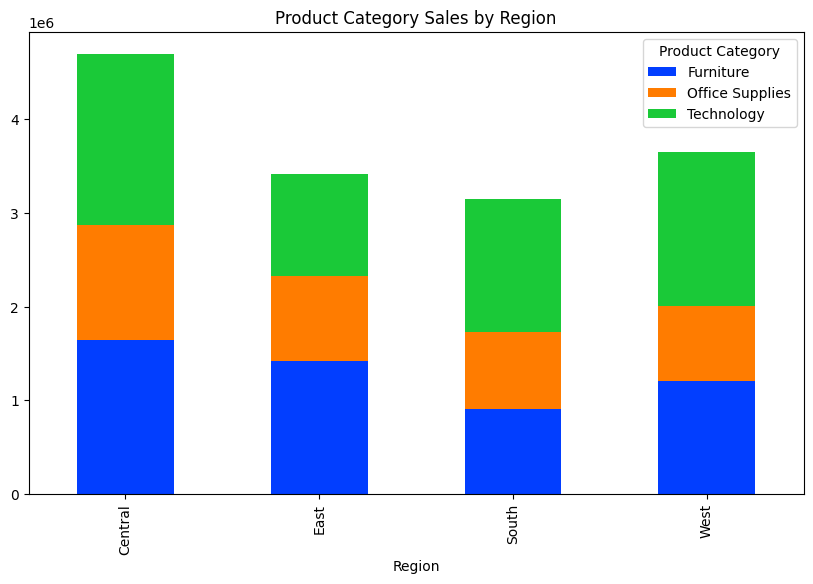

In [34]:
region_category_sales = superstore_sales.groupby(['Region', 'Product Category'])['Sales'].sum().unstack()
region_category_sales.plot(kind='bar', stacked=True, title='Product Category Sales by Region', figsize=(10, 6))

3- Stock levels across different product categories and locations

<Axes: title={'center': 'Stock Levels by Product Category and Location'}, xlabel='Product Category'>

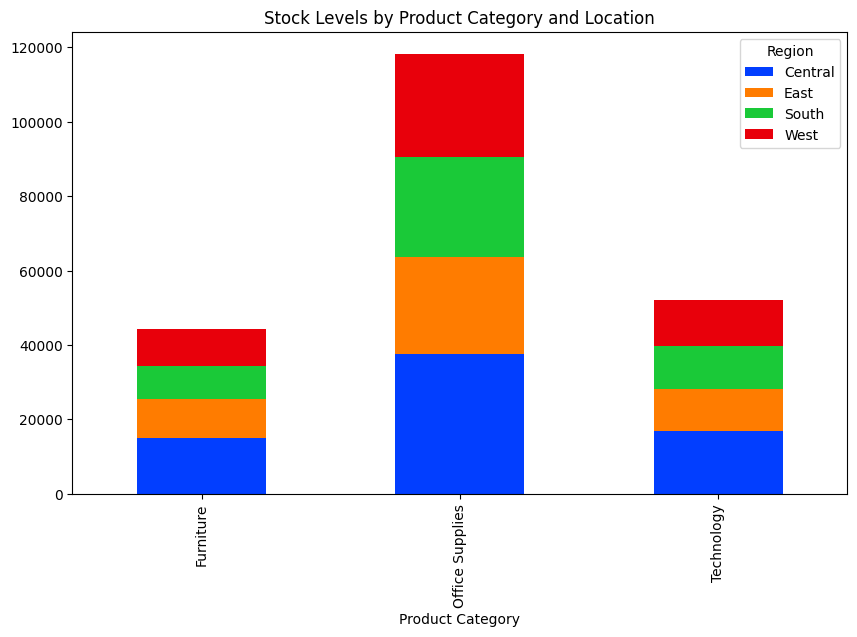

In [35]:
stock_levels = superstore_sales.groupby(['Product Category', 'Region'])['Order Quantity'].sum().unstack()
stock_levels.plot(kind='bar', stacked=True, title='Stock Levels by Product Category and Location', figsize=(10, 6))

4- How quickly are products selling out, and which categories have faster turnover

<Axes: title={'center': 'Inventory Turnover Rate by Product Category'}, xlabel='Product Category', ylabel='Turnover Rate'>

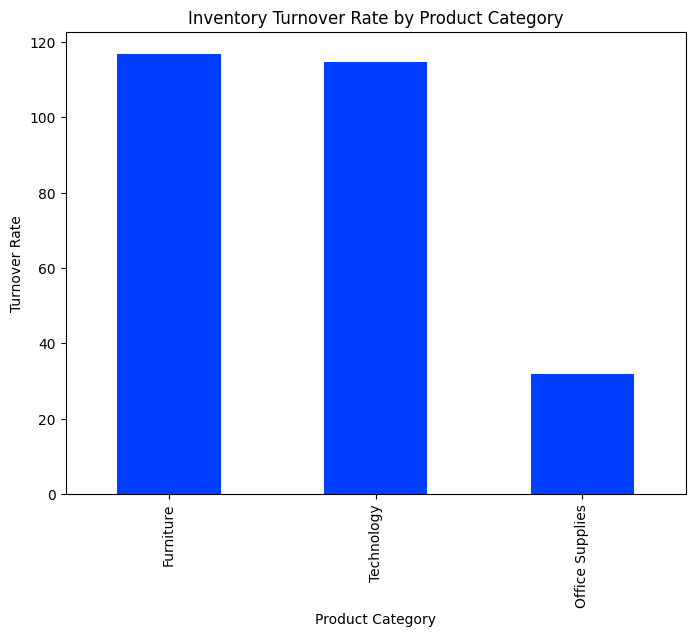

In [36]:
# Calculate turnover as the ratio of total sales to total order quantity for each product category
category_sales_qty = superstore_sales.groupby('Product Category')[['Sales', 'Order Quantity']].sum()
category_sales_qty['Turnover Rate'] = category_sales_qty['Sales'] / category_sales_qty['Order Quantity']

# Plot turnover rate by product category
category_sales_qty['Turnover Rate'].sort_values(ascending=False).plot(kind='bar', title='Inventory Turnover Rate by Product Category', xlabel='Product Category', ylabel='Turnover Rate', figsize=(8, 6))

The Profit of each Product category in every years

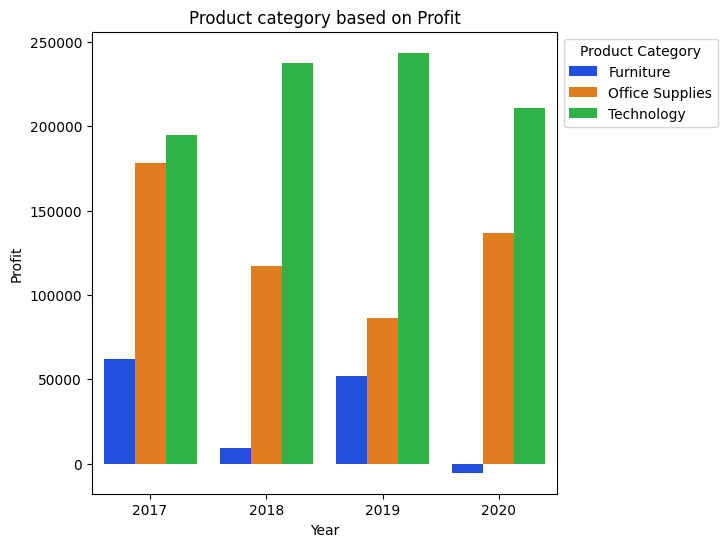

In [37]:
ProductCategoryProfitOverYears = superstore_sales.groupby(['Year','Product Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data = ProductCategoryProfitOverYears, x ='Year', y='Profit',hue='Product Category')
plt.title('Product category based on Profit')
plt.legend(title='Product Category', loc = 'best',bbox_to_anchor=(1,1))
plt.show()

The Profit of each Product category in every years and Region

<Axes: title={'center': 'Product Category Profit by Region'}, xlabel='Year,Region'>

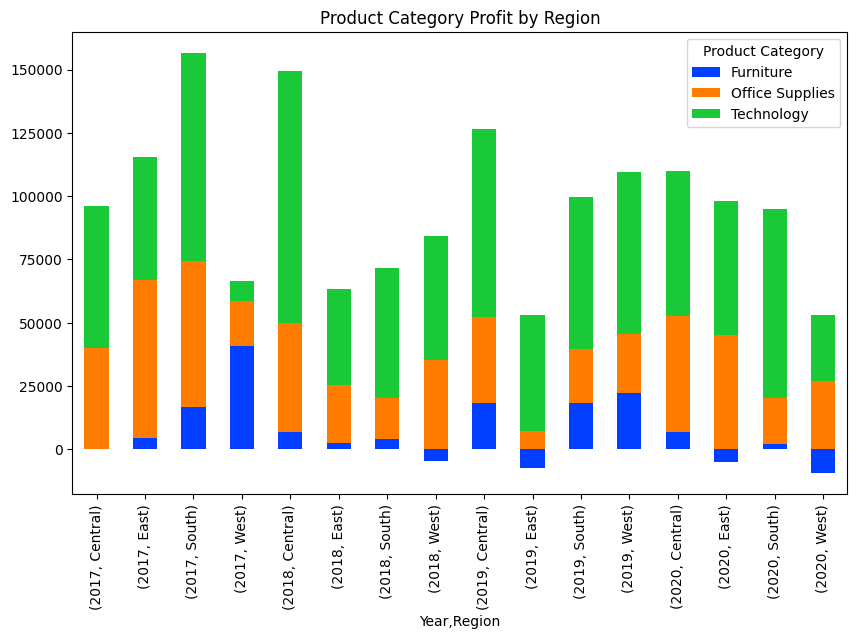

In [38]:
region_category_sales = superstore_sales.groupby(['Year', 'Region', 'Product Category'])['Profit'].sum().unstack()
region_category_sales.plot(kind='bar', stacked=True, title='Product Category Profit by Region', figsize=(10, 6))

The Profit of each Product sub-category in every years and Region

In [39]:
# Grouping data by year and product sub-category to calculate total Profit
ProductSalesOverYears = superstore_sales.groupby(['Year', 'Product Sub-Category'])['Profit'].sum().reset_index()

# Creating an interactive bar chart
fig = px.bar(ProductSalesOverYears, 
             x='Year', 
             y='Profit', 
             color='Product Sub-Category', 
             title='Top Product based on Profit',
             labels={'Year': 'Year', 'Profit': 'Total Profit'},
             barmode='group',  # Shows bars for each category side by side
             height=600,  # Adjust the height of the figure
             width=800)  # Adjust the width of the figure

# Update the layout to position the legend outside the plot
fig.update_layout(legend=dict(
    title='Product Sub-Category',
    x=1,  # Position it outside the plot area on the x-axis
    y=1,
    traceorder='normal'
))

# Show the interactive plot
fig.show()


The top product sub-category over all years based on Profit is `Telephones` and communications and `Bookcases` the product sub-category that cuses the most loss in the first year While `Tables` is cause for loses in the following 3 years

5- Relationship Between Price and Sales Volume

<Axes: title={'center': 'Price vs Sales Volume'}, xlabel='Unit Price', ylabel='Sales'>

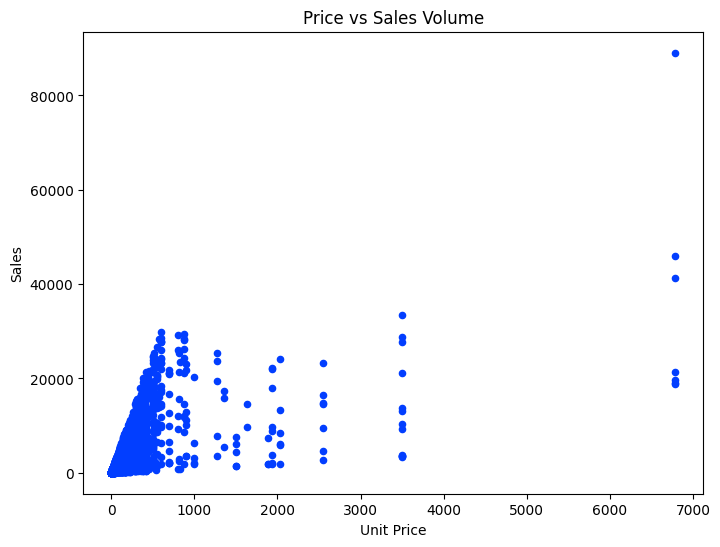

In [40]:
superstore_sales.plot(kind='scatter', x='Unit Price', y='Sales', title='Price vs Sales Volume', figsize=(8, 6))

4. Profitability

Questions:

1- Which regions or product categories have the highest profit margins?

2- How do shipping costs affect profitability across different regions?

3- Are there any specific customer segments that contribute to higher profitability?

4- the relation between profit and discount

5- profit over years

6- Profit over both regoins and years

7- The highest and the lowest five product based on profit 

8- The relation between shipping mode and profit 

9- the relation between Unit price and Profit

10- The affect of container size on Shipment Cost and Profit Amount

11- who is the top and low five customer based on sales and profit that the company may target to improve preformance

1- Profit Margins by Region

<Axes: title={'center': 'Profit Margins by Region'}, xlabel='Region'>

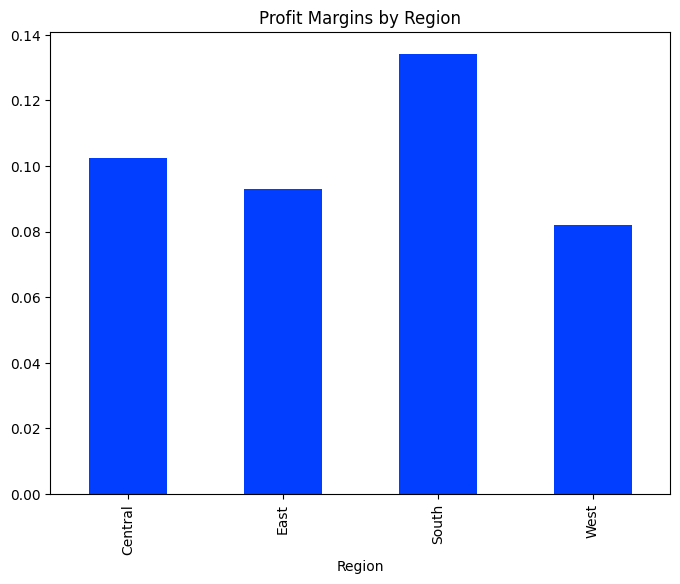

In [41]:
profit_margin_by_region = superstore_sales.groupby('Region')['Profit'].sum() / superstore_sales.groupby('Region')['Sales'].sum()
profit_margin_by_region.plot(kind='bar', title='Profit Margins by Region', figsize=(8, 6))

2- Impact of Shipping Costs on Profitability

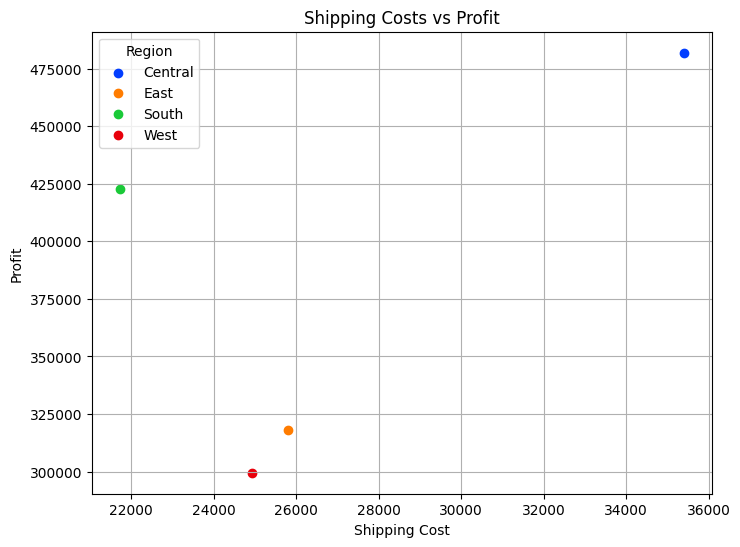

In [42]:
shipping_profit = superstore_sales.groupby('Region')[['Shipping Cost', 'Profit']].sum().reset_index()

plt.figure(figsize=(8, 6))

for region in shipping_profit['Region'].unique():
    subset = shipping_profit[shipping_profit['Region'] == region]
    plt.scatter(subset['Shipping Cost'], subset['Profit'], label=region)

plt.title('Shipping Costs vs Profit')
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.legend(title='Region')
plt.grid()
plt.show()

3- Calculate Profit by Customer Segment

<Axes: title={'center': 'Total Profit by Customer Segment'}, xlabel='Customer Segment'>

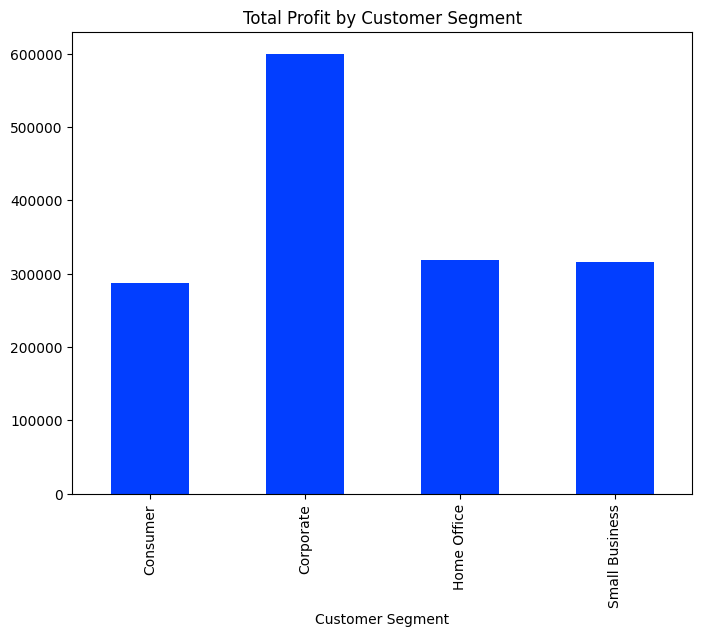

In [43]:
# Calculate total profit by customer segment
segment_profit = superstore_sales.groupby('Customer Segment')['Profit'].sum()

# Plot total profit by customer segment
segment_profit.plot(kind='bar', title='Total Profit by Customer Segment', figsize=(8, 6))

4- the relation between profit and discount

<Figure size 640x480 with 0 Axes>

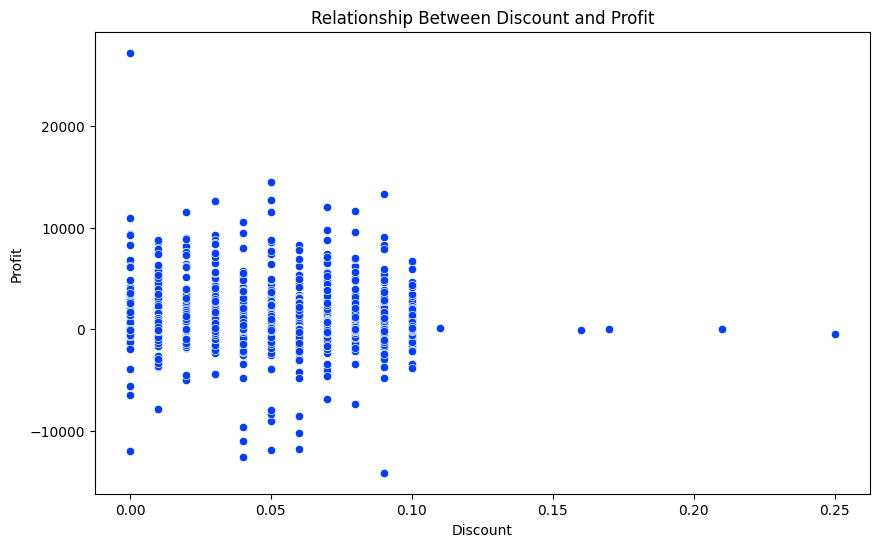

In [44]:
# Relationship Between Discount and Profit

plt.clf() 
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data = superstore_sales)
plt.title('Relationship Between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

the corelation between Profit and discount

In [45]:
correlation = superstore_sales['Discount'].corr(superstore_sales['Profit'])
print(f'Correlation between Discount and Profit: {correlation}')

Correlation between Discount and Profit: -0.037128373576373545


there is no correlation between Discount and Profit.

5- profit over years

In [46]:
superstore_sales['Year'] = superstore_sales['Order Date'].dt.year
profitOverYears = superstore_sales.groupby('Year')['Profit'].sum().reset_index()
print(profitOverYears)


   Year     Profit
0  2017  434538.73
1  2018  363871.48
2  2019  381455.99
3  2020  341901.78


In [47]:
profitOverYears['Change'] = profitOverYears['Profit'].diff()

# Print profit changes for analysis
print(profitOverYears)

   Year     Profit    Change
0  2017  434538.73       NaN
1  2018  363871.48 -70667.25
2  2019  381455.99  17584.51
3  2020  341901.78 -39554.21


C:\Users\elame\AppData\Local\Temp\ipykernel_9120\3450774303.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 640x480 with 0 Axes>

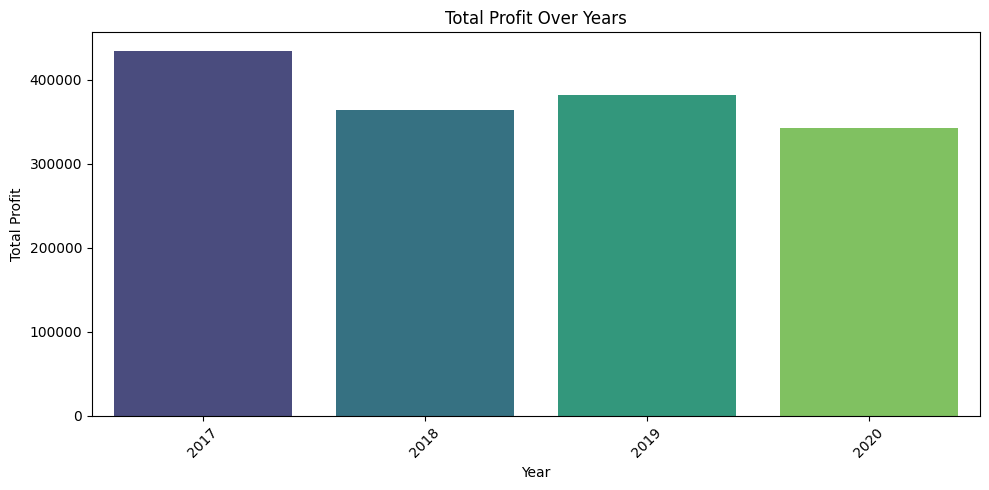

In [48]:
# sns.barplot(data=profitOverYears ,x= superstore_sales['year'] , y = superstore_sales['Profit'])
# plt.show()

# Create a bar plot
plt.clf()
plt.figure(figsize=(10, 5))
sns.barplot(data=profitOverYears, x='Year', y='Profit', palette='viridis')
plt.title('Total Profit Over Years')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


2020 has the most profit and 2018 has the lowest

comparison bewteen Sales and Profit by Region and Year in every regoin

<Figure size 640x480 with 0 Axes>

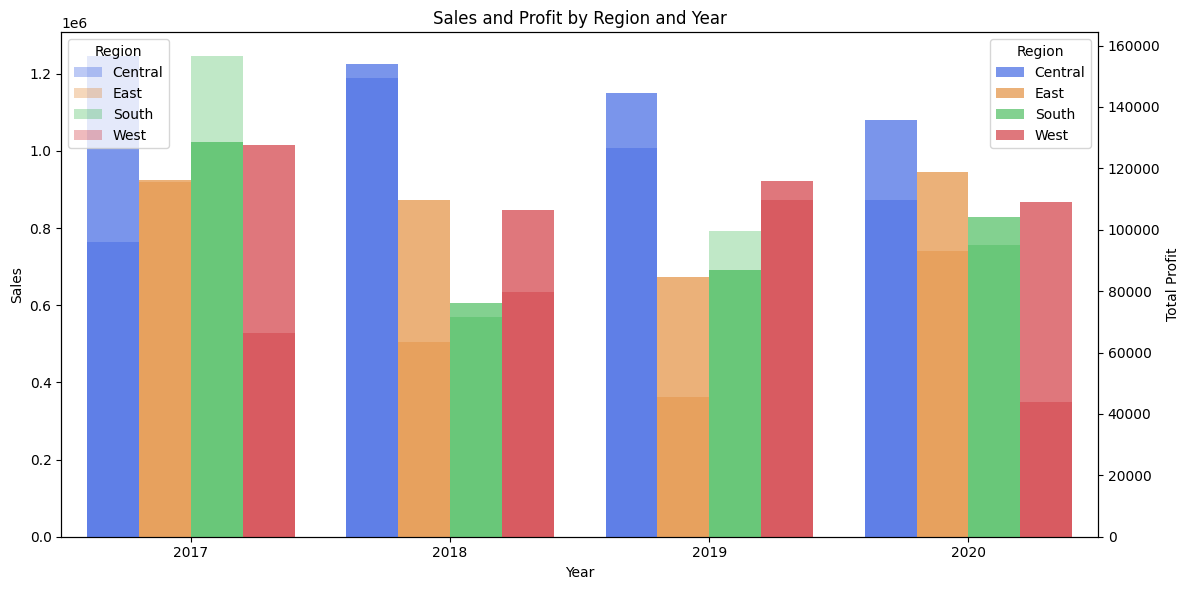

In [49]:
# Grouping the data by year and Region, summing Sales and Profit
SalesAndProfitByYearsAndRegion = superstore_sales.groupby(['Year', 'Region'])[['Sales', 'Profit']].sum().reset_index()

# Plotting Sales and Profit together for comparison
plt.clf()
plt.figure(figsize=(12, 6))
# Creating the bar plot for Sales
sns.barplot(data=SalesAndProfitByYearsAndRegion, x='Year', y='Sales', hue='Region', alpha=0.6)

# Creating a second y-axis for Profit
ax2 = plt.twinx()
sns.barplot(data=SalesAndProfitByYearsAndRegion, x='Year', y='Profit', hue='Region', ax=ax2, alpha=0.3)

# Setting titles and labels
plt.title('Sales and Profit by Region and Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
ax2.set_ylabel('Total Profit')

# Show legend
plt.legend(title='Region', loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

the Sales in 2018 in East was not the lowest , the profit was the lowest

6- Profit over both regoins and years

In [50]:
ProfitOverYearsRegions = superstore_sales.groupby(['Year','Region'])['Profit'].sum().reset_index()
print(ProfitOverYearsRegions)

    Year   Region     Profit
0   2017  Central   95989.26
1   2017     East  115609.93
2   2017    South  156477.53
3   2017     West   66462.01
4   2018  Central  149427.02
5   2018     East   63386.83
6   2018    South   71444.21
7   2018     West   79613.42
8   2019  Central  126631.22
9   2019     East   45621.66
10  2019    South   99588.31
11  2019     West  109614.80
12  2020  Central  109843.70
13  2020     East   93233.69
14  2020    South   94997.08
15  2020     West   43827.31


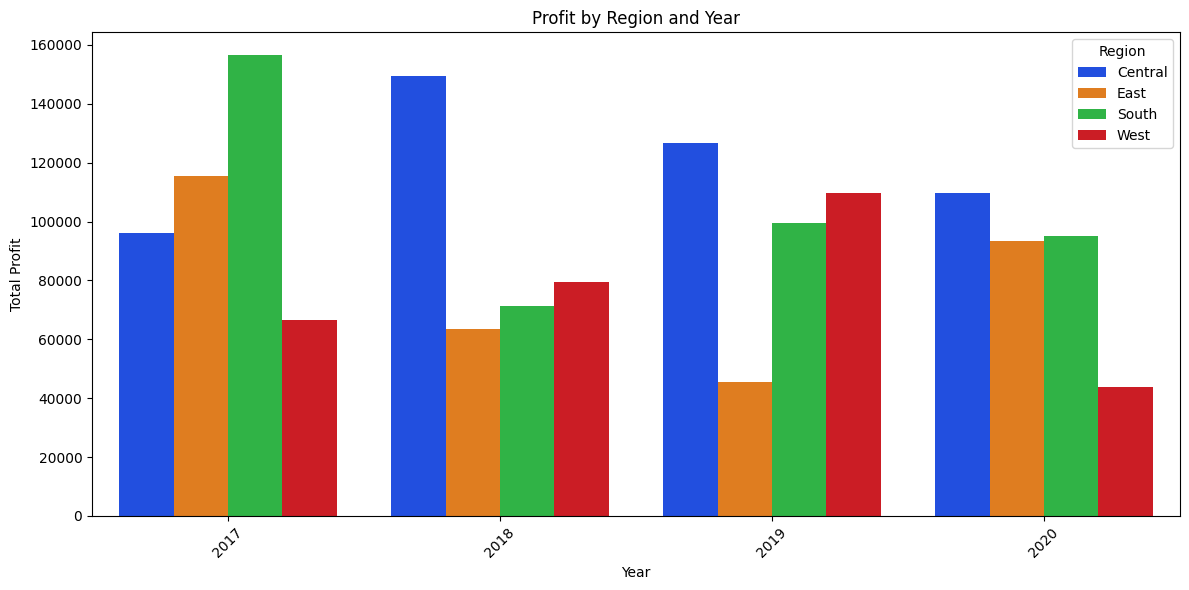

In [51]:
# Profit by Region and Year
plt.figure(figsize=(12, 6))
sns.set_palette('bright')  
sns.barplot(data=ProfitOverYearsRegions, x='Year', y='Profit', hue='Region')
plt.title('Profit by Region and Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

the region with the hieghests profit over all the years was Centeral and the east was the lowest till 2020

7- The highest and the lowest five product based on profit 

## The Top Product Based on Profits ##
 Year                                                                Product Name   Profit
 2019                                        Hewlett Packard LaserJet 3310 Copier 33825.10
 2020                              Global Troy Executive Leather Low-Back Tilter 25362.90
 2018                                        Hewlett Packard LaserJet 3310 Copier 25092.25
 2017 Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind 24557.21
 2020                 Hewlett-Packard cp1700 [D, PS] Series Color Inkjet Printers 22375.31

## The Lowest Product Based on Profits ##
 Year                                          Product Name    Profit
 2017                     Epson DFX-8500 Dot Matrix Printer -20133.62
 2017                 Canon imageCLASS 2200 Advanced Copier -14830.99
 2017 Okidata Pacemark 4410N Wide Format Dot Matrix Printer -14761.93
 2019                 Canon imageCLASS 2200 Advanced Copier -12253.38
 2020 Okidata Pacemark

C:\Users\elame\AppData\Local\Temp\ipykernel_9120\3705758638.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


c:\Users\elame\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 153 (\x99) missing from font(s) Arial.



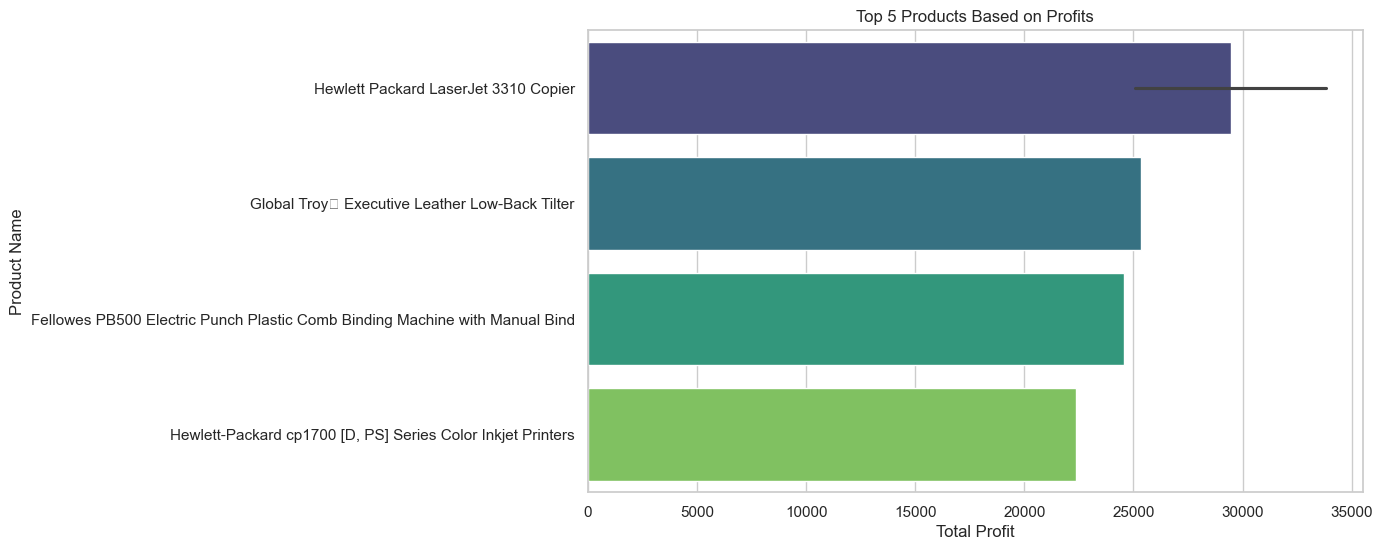

C:\Users\elame\AppData\Local\Temp\ipykernel_9120\3705758638.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




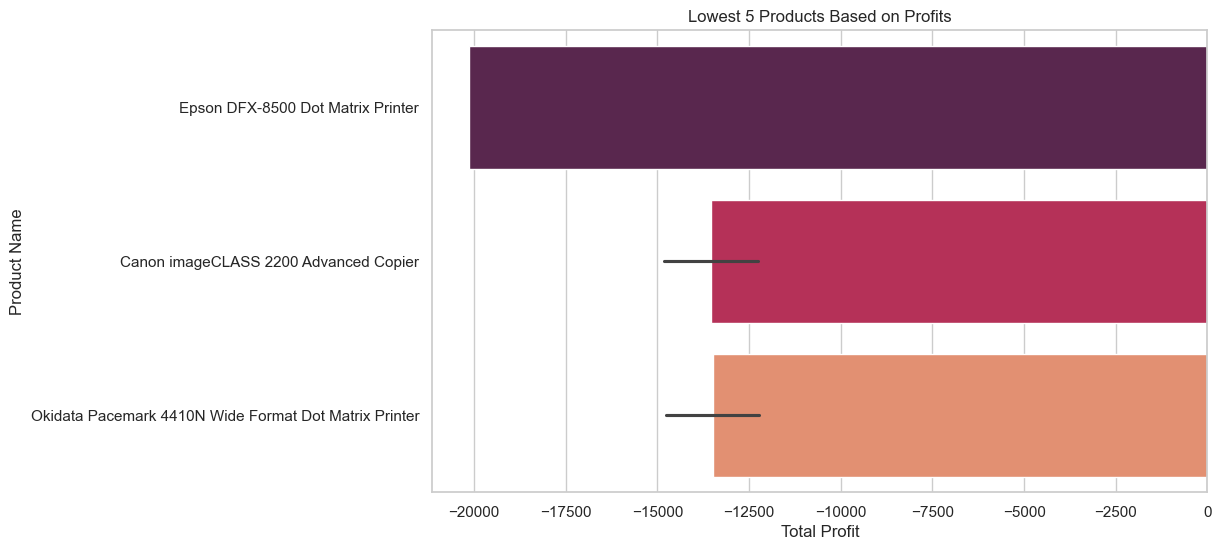

In [52]:

##The top Product  based on Profits
# Grouping the data
ProductProfitOverYears = superstore_sales.groupby(['Year','Product Name'])['Profit'].sum().reset_index()


# Find the top product
top_products = ProductProfitOverYears.nlargest(5,'Profit')
lowest_products = ProductProfitOverYears.nsmallest(5,'Profit')
# Printing the results 
print("## The Top Product Based on Profits ##")
print(top_products.to_string(index=False))

print("\n## The Lowest Product Based on Profits ##")
print(lowest_products.to_string(index=False))

# Setting the visual style
sns.set(style="whitegrid")

# Plotting the Top Products
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Product Name', data=top_products, palette='viridis')
plt.title('Top 5 Products Based on Profits')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

# Plotting the Lowest Products
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Product Name', data=lowest_products, palette='rocket')
plt.title('Lowest 5 Products Based on Profits')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

The most seller Product over years is Telephones and communications(category:Technology), the product that loses the most money is Tables (category:Furniture).

8- The relation between shipping mode and profit 

        Ship Mode      Profit
0  Delivery Truck  235.292208
1     Express Air  149.979969
2     Regular Air  176.187049


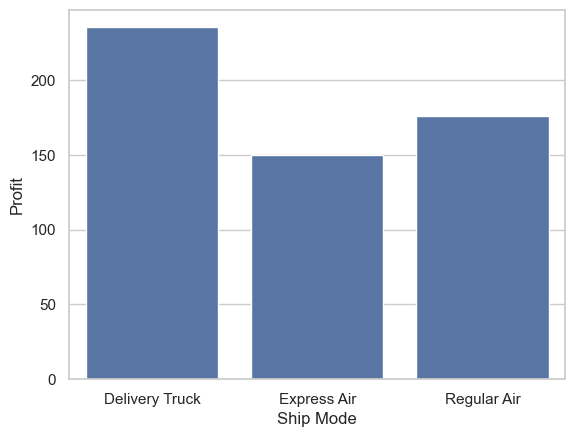

In [53]:
# mean Profit by ship mode
mean_Profit_by_ship_mode = superstore_sales.groupby('Ship Mode')['Profit'].mean().reset_index()
print(mean_Profit_by_ship_mode)

sns.barplot(data= mean_Profit_by_ship_mode, x = "Ship Mode", y = "Profit")
plt.show()

 shipping modes, with Express Air and Regular Air contributing positively to profits while Delivery Truck operates at a loss.

9- the relation between Unit price and Profit

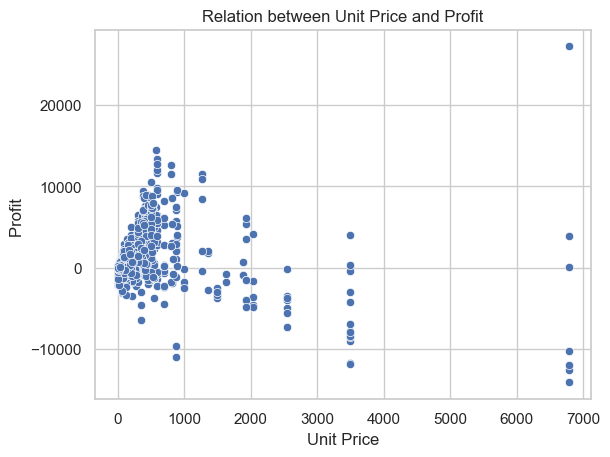

In [54]:
sns.scatterplot(data = superstore_sales , x ='Unit Price', y ='Profit')
plt.title('Relation between Unit Price and Profit')
plt.xlabel('Unit Price')
plt.ylabel('Profit ')
plt.show()

In [55]:
correlation = superstore_sales['Unit Price'].corr(superstore_sales['Profit'])
print(f'Correlation between Unit Price and Profit: {correlation}')

Correlation between Unit Price and Profit: -0.008853881167133414


there is no correlation between them

10- The affect of container size on Shipment Cost and Profit Amount

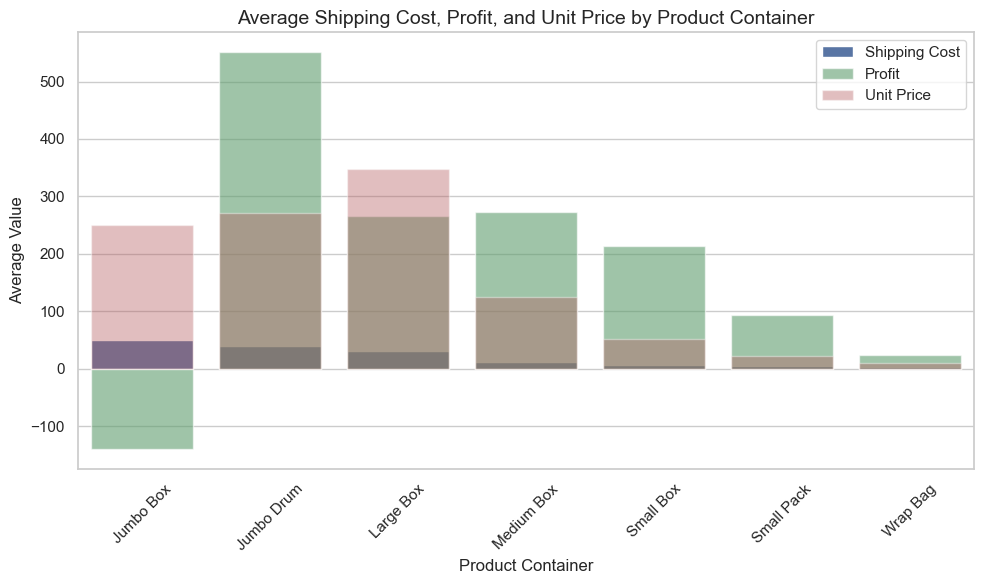

In [56]:
CostBasedContainer  = superstore_sales.groupby('Product Container')['Shipping Cost'].mean().reset_index()
#print(CostBasedContainer)
ProfitBasedContainer  = superstore_sales.groupby('Product Container')['Profit'].mean().reset_index()
#print(ProfitBasedContainer)
UnitPriceBasedContainer = superstore_sales.groupby('Product Container')['Unit Price'].mean().reset_index()
#print(UnitPriceBasedContainer)

# Merge the three DataFrames based on 'Product Container'
merged_df = pd.merge(CostBasedContainer, ProfitBasedContainer, on='Product Container')
merged_df = pd.merge(merged_df, UnitPriceBasedContainer, on='Product Container')

# Set up the figure and size
plt.figure(figsize=(10, 6))

# Plot Shipping Cost
sns.barplot(x='Product Container', y='Shipping Cost', data=merged_df, color='b', label='Shipping Cost')

# Plot Profit (on the same axes)
sns.barplot(x='Product Container', y='Profit', data=merged_df, color='g', alpha=0.6, label='Profit')

# Plot Unit Price (on the same axes)
sns.barplot(x='Product Container', y='Unit Price', data=merged_df, color='r', alpha=0.4, label='Unit Price')

# Add title and labels
plt.title('Average Shipping Cost, Profit, and Unit Price by Product Container', fontsize=14)
plt.xlabel('Product Container', fontsize=12)
plt.ylabel('Average Value', fontsize=12)

# Show legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

While Jumbo and Large boxes required `High Shipping` cost and increase `Unit Price` they lead to a `loss`. On the other hand the most `profitable` containers are `medium and smaller containers`.

In [57]:
correlation_shipment_unit_price = superstore_sales['Shipping Cost'].corr(superstore_sales['Unit Price'])

# Calculate the correlation between Shipment Cost and Profit
correlation_shipment_profit = superstore_sales['Shipping Cost'].corr(superstore_sales['Profit'])

# Print the results
print("Correlation between Shipment Cost and Unit Price:", correlation_shipment_unit_price)
print("Correlation between Shipment Cost and Profit:", correlation_shipment_profit)

Correlation between Shipment Cost and Unit Price: 0.2399593749699545
Correlation between Shipment Cost and Profit: -0.021362183449271026


there is a quite good correlation between Shipment Cost and Unit Price
while a little or weak correlation between Shipment Cost and Profit

11- who is the top and low five customer based on sales and profit

In [58]:
# Find the top Customer 
# Top and Lowest Customers by Profit
topCustomerProfit = superstore_sales.groupby('Customer Name')['Profit'].sum().reset_index()

# Find top 5 customers by Profit
topEltopP = topCustomerProfit.nlargest(5, 'Profit')

# Find lowest 5 customers by Profit
lowEltopP = topCustomerProfit.nsmallest(5, 'Profit')

# Top and Lowest Customers by Sales
topCustomerSales = superstore_sales.groupby('Customer Name')['Sales'].sum().reset_index()

# Find top 5 customers by Sales
topEltopS = topCustomerSales.nlargest(5, 'Sales')

# Find lowest 5 customers by Sales
lowEltopS = topCustomerSales.nsmallest(5, 'Sales')

C:\Users\elame\AppData\Local\Temp\ipykernel_9120\3832506635.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\elame\AppData\Local\Temp\ipykernel_9120\3832506635.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\elame\AppData\Local\Temp\ipykernel_9120\3832506635.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\elame\AppData\Local\Temp\ipykernel_9120\3832506635.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same eff

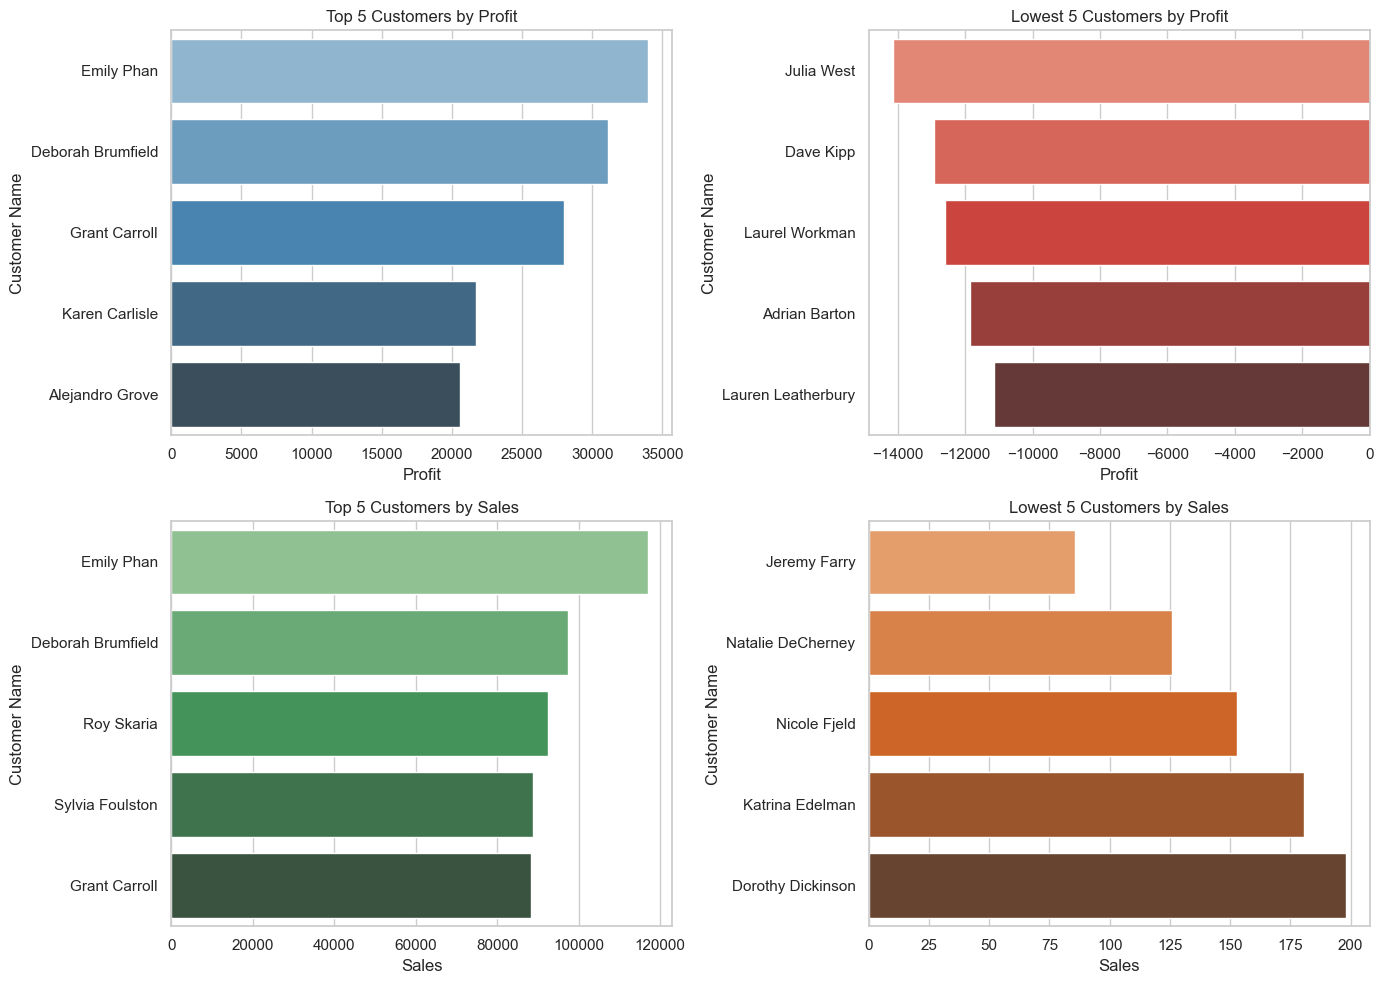

In [59]:
#Create a figure for the subplots
plt.figure(figsize=(14, 10))

# Subplot for Top Customers by Profit
plt.subplot(2, 2, 1)
sns.barplot(data=topEltopP, x='Profit', y='Customer Name', palette='Blues_d')
plt.title('Top 5 Customers by Profit')
plt.xlabel('Profit')
plt.ylabel('Customer Name')

# Subplot for Lowest Customers by Profit
plt.subplot(2, 2, 2)
sns.barplot(data=lowEltopP, x='Profit', y='Customer Name', palette='Reds_d')
plt.title('Lowest 5 Customers by Profit')
plt.xlabel('Profit')
plt.ylabel('Customer Name')

# Subplot for Top Customers by Sales
plt.subplot(2, 2, 3)
sns.barplot(data=topEltopS, x='Sales', y='Customer Name', palette='Greens_d')
plt.title('Top 5 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer Name')

# Subplot for Lowest Customers by Sales
plt.subplot(2, 2, 4)
sns.barplot(data=lowEltopS, x='Sales', y='Customer Name', palette='Oranges_d')
plt.title('Lowest 5 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer Name')

# Adjust layout
plt.tight_layout()
plt.show()


  **5.Losses analysis**

questions:

1-what is the losses of each status?

2-which mode lose the most?

3-which priority lose the most?

4-which container lose the most?

5-which segment lose the most?

6-which region lose the most?

7-which category lose the most?

8-which subcategory loses the most?

----------------------------

1-what is the losses of each status?

<Axes: title={'center': 'losses of returned items'}, xlabel='Status'>

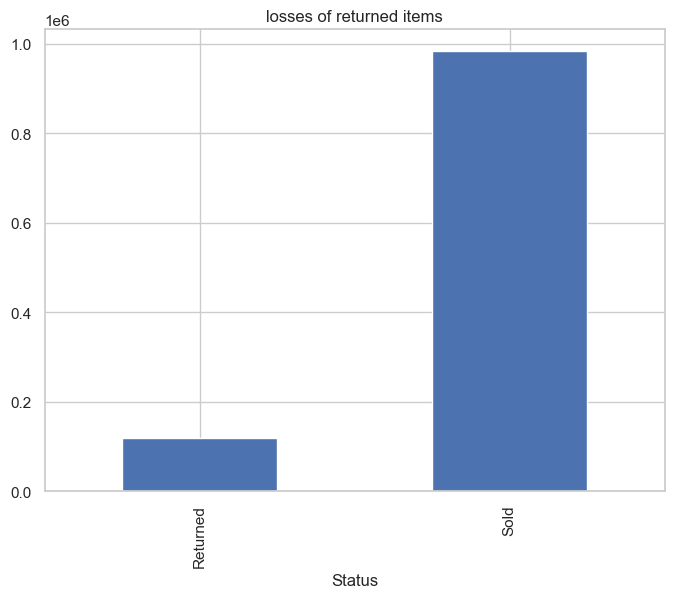

In [60]:
negative=superstore_sales[superstore_sales['Profit']<0]
positive=superstore_sales[superstore_sales['Profit']>0]
return_loss=-negative.groupby('Status')['Profit'].sum()
return_loss.plot(kind='bar', title='losses of returned items', figsize=(8, 6))

the largest loss is concerned with the sold items so, the focus would be on them

2-which mode lose the most?

<Axes: title={'center': 'loss&income for every mode'}, xlabel='Ship Mode'>

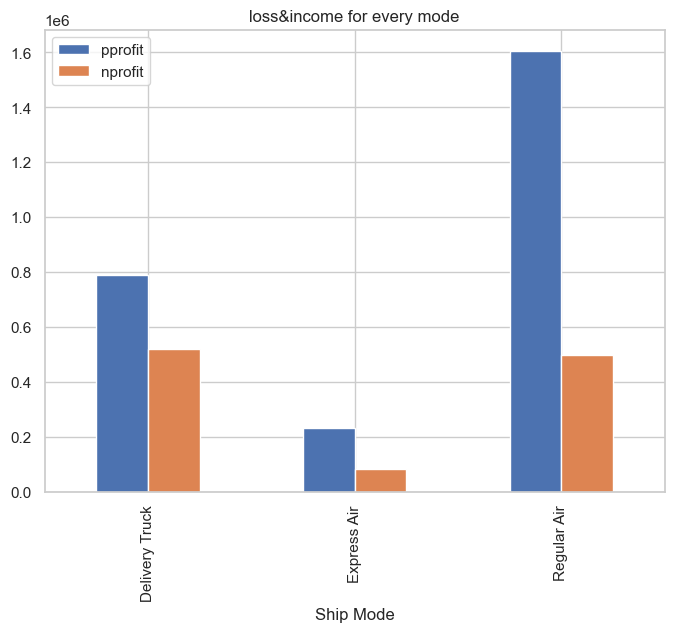

In [61]:
Ship_loss=-negative.groupby('Ship Mode')['Profit'].sum()
ship_income=positive.groupby('Ship Mode')['Profit'].sum()
mode_frame = pd.DataFrame({
    'pprofit': ship_income,
    'nprofit': Ship_loss    
})

mode_frame.plot(kind='bar', title='loss&income for every mode', figsize=(8, 6))
#Ship_loss.plot(kind='bar', title='losses of returned items', figsize=(8, 6))

losses from delivery truck and regular are are simalar, in the other hand, regular are has alot of income so the plane losses value
is not enough

by dividing the losses over the income, it would give us the ratio by which this mode lose

ex. if I have income 100 and losses 20 then the ratio would be the 1/5 (20%)

ex. if I have total income of 2000 and the lose ratio is 15% then the losses would be 2000*0.15=300

<Axes: title={'center': 'the lose ratio for every mode'}, xlabel='Ship Mode'>

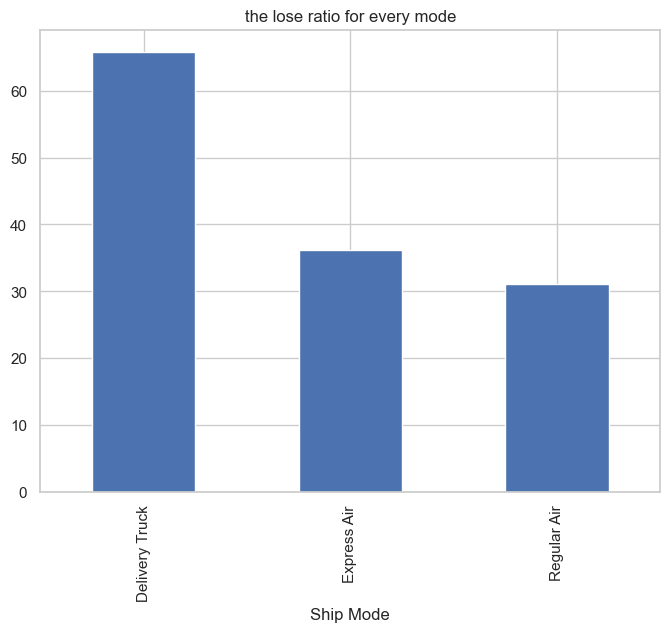

In [62]:
Ship_lossavg=-100*negative.groupby('Ship Mode')['Profit'].sum() / positive.groupby('Ship Mode')['Profit'].sum()
Ship_lossavg.plot(kind='bar', title='the lose ratio for every mode', figsize=(8, 6))

after seeing the the percent of the losses to the income, it turns out regular air is not bad. Actually it is more efficient than the express air.
the gragh shows that there is a problem with the truck as it has >60% losses which is alot

3-which priority lose the most?

<Axes: title={'center': 'losses of returned items'}, xlabel='Order Priority'>

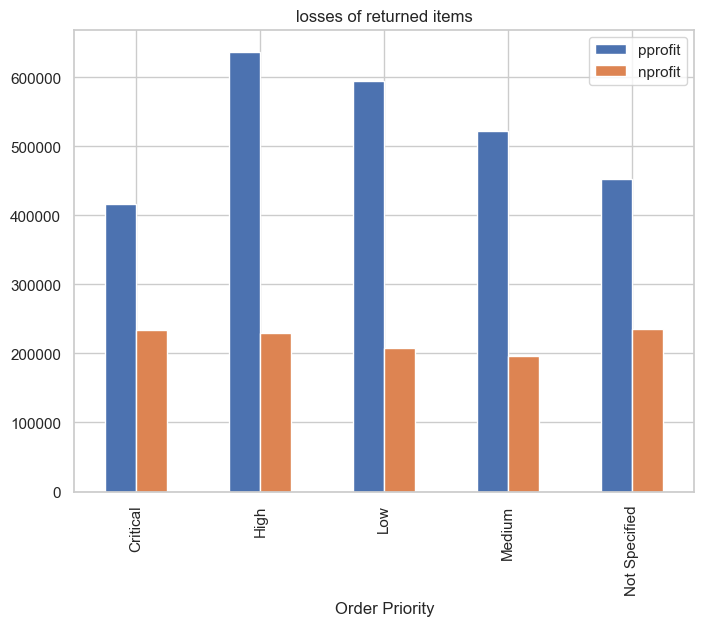

In [63]:
Priority_loss=-negative.groupby('Order Priority')['Profit'].sum()
Priority_income=positive.groupby('Order Priority')['Profit'].sum()
Priority_frame = pd.DataFrame({
    'pprofit': Priority_income,
    'nprofit': Priority_loss    
})
Priority_frame.plot(kind='bar', title='loss&income for every priority', figsize=(8, 6))

<Axes: title={'center': 'losses of returned items'}, xlabel='Order Priority'>

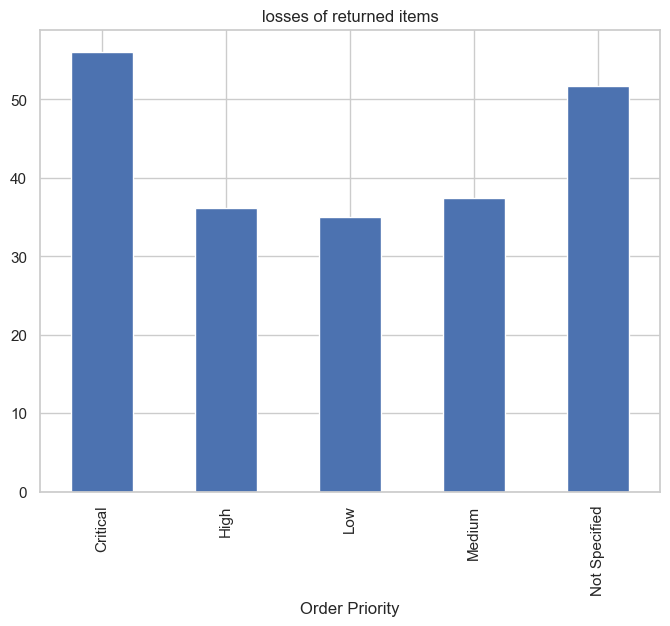

In [64]:
Priority_lossavg=-100*negative.groupby('Order Priority')['Profit'].sum() / positive.groupby('Order Priority')['Profit'].sum()
Priority_lossavg.plot(kind='bar', title='losses ratio for priorities', figsize=(8, 6))

as shown, the numbers of loss are close but for the percentages, the "critical" and "not specified" sections results in losses which exceed 50%!

4-which container lose the most?

<Axes: title={'center': 'losses of returned items'}, xlabel='Product Container'>

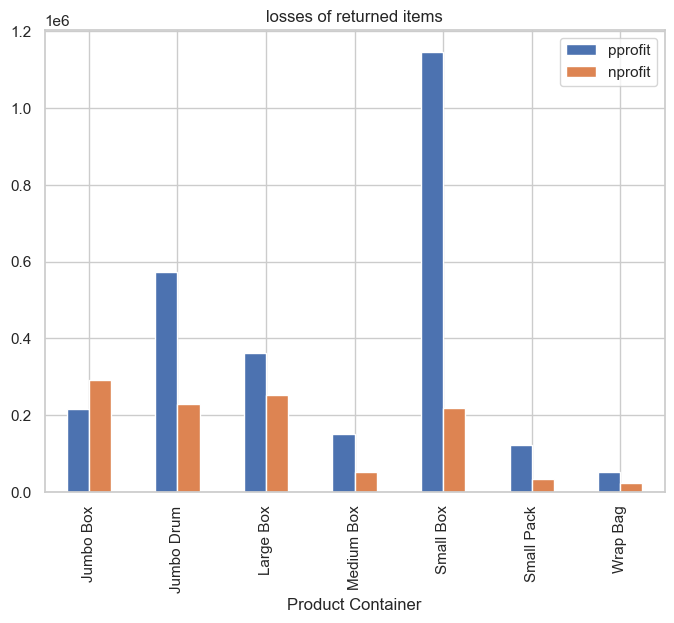

In [65]:
Container_loss=-negative.groupby('Product Container')['Profit'].sum()
Container_income=positive.groupby('Product Container')['Profit'].sum()
Container_frame = pd.DataFrame({
    'pprofit': Container_income,
    'nprofit': Container_loss    
})
Container_frame.plot(kind='bar', title='loss&income for every container', figsize=(8, 6))

<Axes: title={'center': 'losses of returned items'}, xlabel='Product Container'>

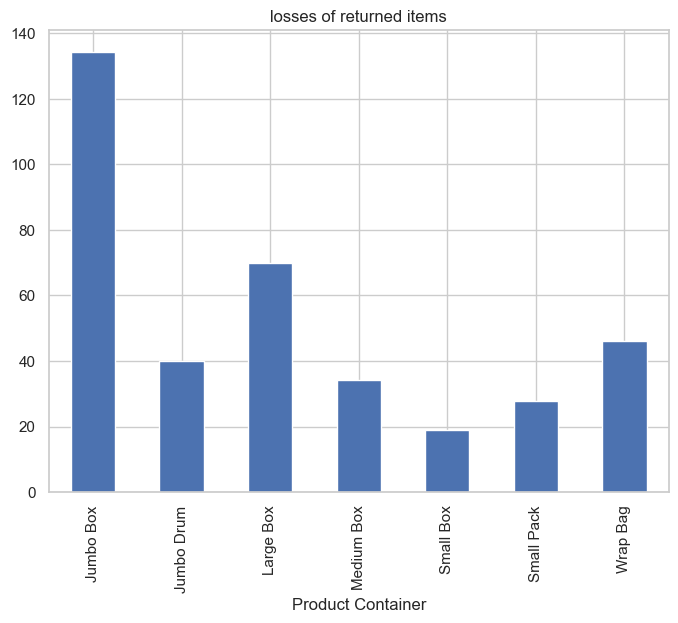

In [66]:
container_lossavg=-100*negative.groupby('Product Container')['Profit'].sum() / positive.groupby('Product Container')['Profit'].sum()
container_lossavg.plot(kind='bar', title='losses ratio for containers', figsize=(8, 6))

for the containers, jumbo box have a loss percent of >130% which is unacceptable
must find a quick solution for it + the large box has a lose rate of >70%

5-which segment lose the most?

<Axes: title={'center': 'Impact of Discounts on Sales'}, xlabel='Customer Segment'>

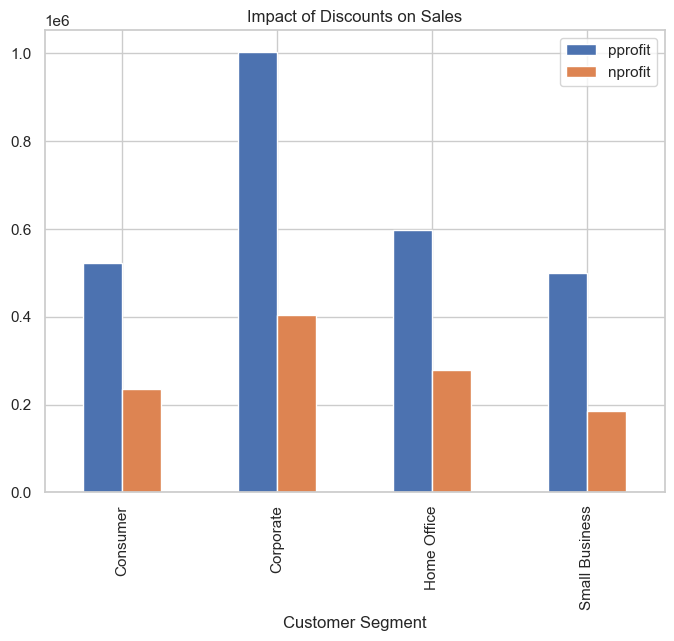

In [73]:
segment_loss = -negative.groupby('Customer Segment')['Profit'].sum()
segment_income=positive.groupby('Customer Segment')['Profit'].sum()
segment_frame = pd.DataFrame({
    'pprofit': segment_income,
    'nprofit': segment_loss    
})

segment_frame.plot(kind='bar', title='loss&income for every segment', figsize=(8, 6))

<Axes: title={'center': 'Impact of Discounts on Sales'}, xlabel='Customer Segment'>

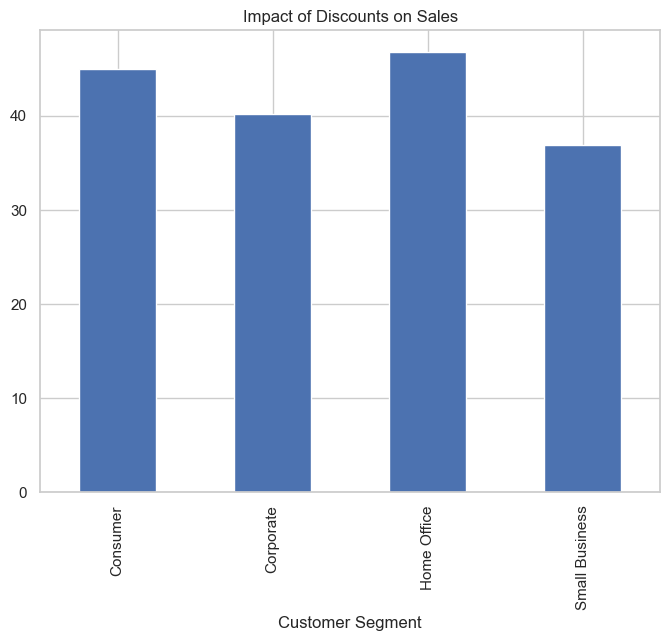

In [74]:
segment_lossavg = -100*negative.groupby('Customer Segment')['Profit'].sum() / positive.groupby('Customer Segment')['Profit'].sum()
segment_lossavg.plot(kind='bar', title='loss ratio for segments', figsize=(8, 6))

non of them exceeds 50% but the lose ratio still high

6-which region lose the most?

<Axes: title={'center': 'Impact of Discounts on Sales'}, xlabel='Region'>

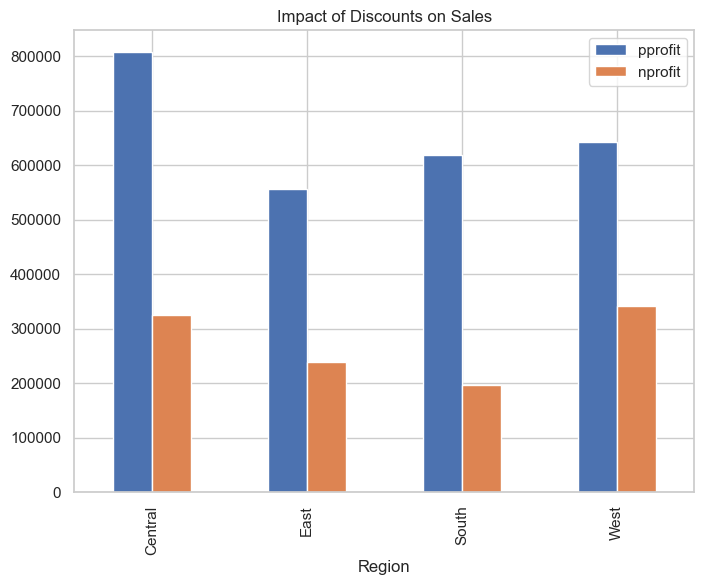

In [75]:
region_loss = -negative.groupby('Region')['Profit'].sum()
region_income=positive.groupby('Region')['Profit'].sum()
region_frame = pd.DataFrame({
    'pprofit': region_income,
    'nprofit': region_loss    
})

region_frame.plot(kind='bar', title='loss&income for every region', figsize=(8, 6))

<Axes: title={'center': 'Impact of Discounts on Sales'}, xlabel='Region'>

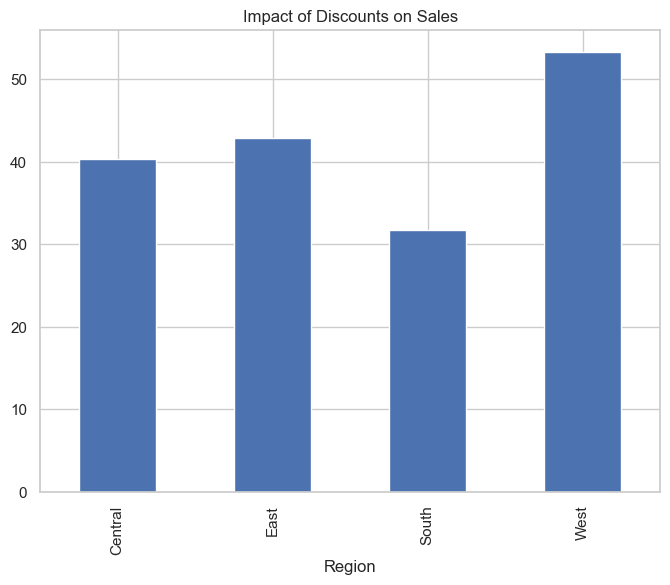

In [77]:
region_lossavg = -100*negative.groupby('Region')['Profit'].sum() / positive.groupby('Region')['Profit'].sum()
region_lossavg.plot(kind='bar', title='loss ratio for regions', figsize=(8, 6))

west has the largest ratio which exceeds 50%

7-which category lose the most?

<Axes: title={'center': 'Impact of Discounts on Sales'}, xlabel='Product Category'>

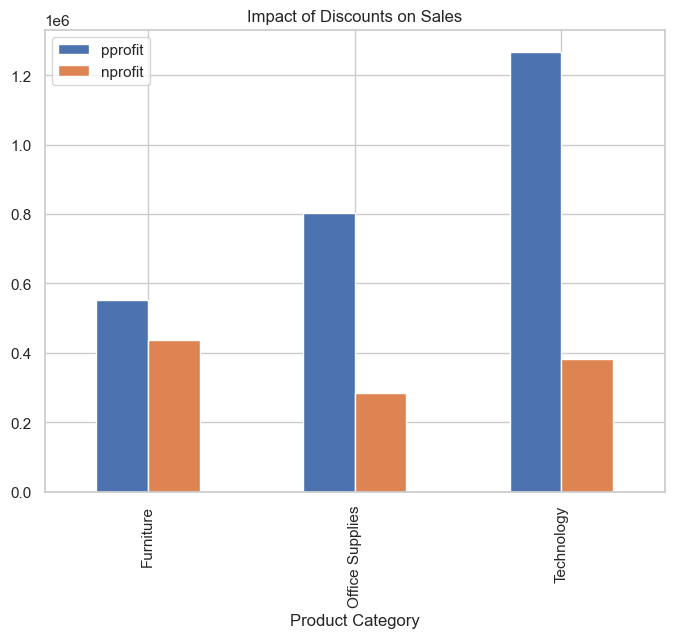

In [67]:
Category_loss = -negative.groupby('Product Category')['Profit'].sum()
Category_income=positive.groupby('Product Category')['Profit'].sum()
Categ = pd.DataFrame({
    'pprofit': Category_income,
    'nprofit': Category_loss    
})

Categ.plot(kind='bar', title='loss&income for every category', figsize=(8, 6))
#Category_loss.plot(kind='bar', title='losses of returned items', figsize=(8, 6))


<Axes: title={'center': 'losses of returned items'}, xlabel='Product Category'>

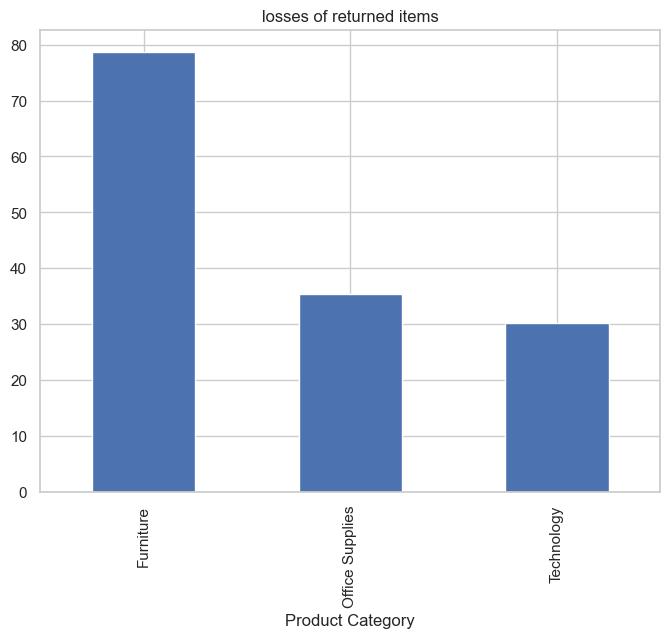

In [68]:
categ_lossavg=-100*negative.groupby('Product Category')['Profit'].sum() / positive.groupby('Product Category')['Profit'].sum()
categ_lossavg.plot(kind='bar', title='losses ratio for categories', figsize=(8, 6))

technology category has alot of losses but the income is so much higher as its percentage is the lowest.
for furniture, it has a lose percent of >75% and causes the biggest lose among other categories

8-which subcategory loses the most?

<Axes: title={'center': 'losses of returned items'}, xlabel='Product Sub-Category'>

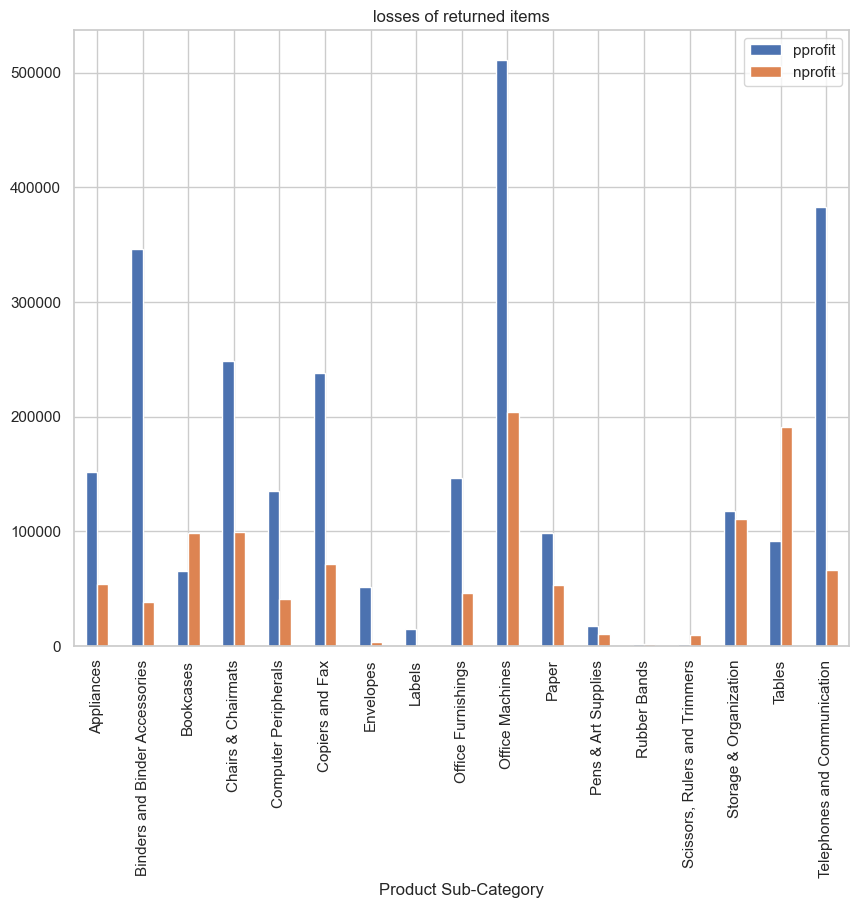

In [71]:
subCategory_loss = -negative.groupby('Product Sub-Category')['Profit'].sum()
subCategory_income=positive.groupby('Product Sub-Category')['Profit'].sum()
subCategory_frame = pd.DataFrame({
    'pprofit': subCategory_income,
    'nprofit': subCategory_loss    
})
subCategory_frame.plot(kind='bar', title='loss&income for every subcategory', figsize=(10, 8))

<Axes: title={'center': 'losses of returned items'}, xlabel='Product Sub-Category'>

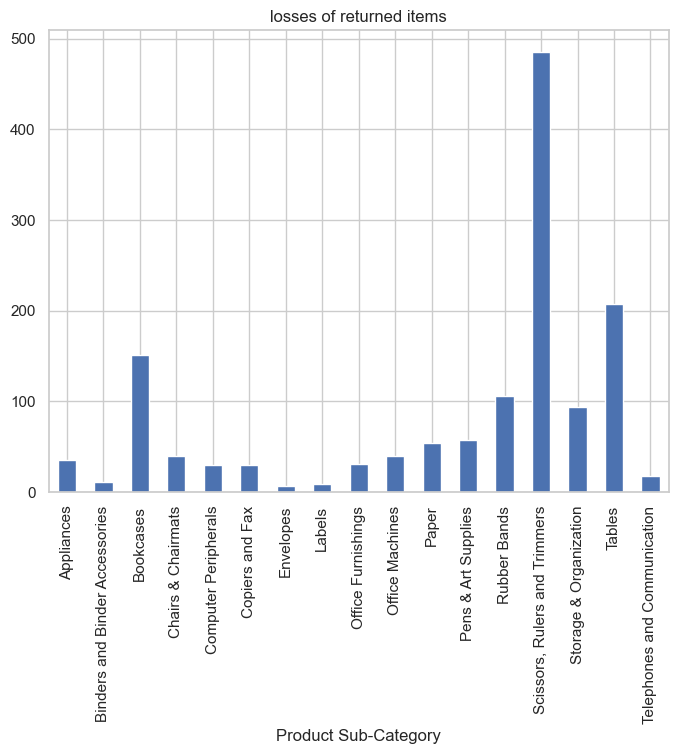

In [72]:
subcateg_lossavg=-100*negative.groupby('Product Sub-Category')['Profit'].sum() / positive.groupby('Product Sub-Category')['Profit'].sum()
subcateg_lossavg.plot(kind='bar', title='losses rotio for subcategories', figsize=(8, 6))

the scissors,rulers&trimmers has a lose rate of >450% ! 
it doesn't affect the total loss as sales for it is small but it is nonsense to continue selling it with this lose rate
there are problems with the bookcases(it also has a problem with returns), tables , rubber bands and organizations as the lose rate exceeds 100%

**6. Returning questions**

questions:

1-how many orders are returned concerned to the sold ones?

2-is the problem in a certain ship mode?

3-is the problem in a certain Category?

4-is the problem in a certain SubCategory?

5-what are the top Products returned?

6-is the problem in a certain Region?

7-is the problem in a certain Customer segment?

8-who are the most customer returning orders?

9-is the problem in a certain container?

10-is the problem in a certain priority?

------------------------------


1-how many orders are returned concerned to the sold ones?

<Axes: title={'center': 'NO of Orders sold&returned'}, xlabel='Status'>

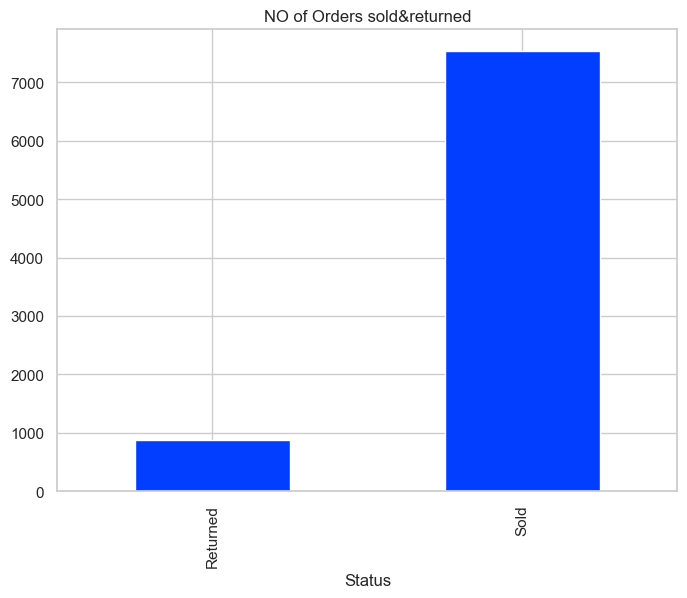

In [141]:
sales_return=superstore_sales[superstore_sales['Status']=='Returned']
bystatus=superstore_sales.groupby('Status')['Order ID'].count()
bystatus.plot(kind='bar', title='NO of Orders sold&returned', figsize=(8, 6))

a thousand returns among more than 8000 orders! it is around eighth of the orders and thats alot

2-is the problem in a certain ship mode?

<Axes: title={'center': 'returns to sold for modes'}, xlabel='Ship Mode'>

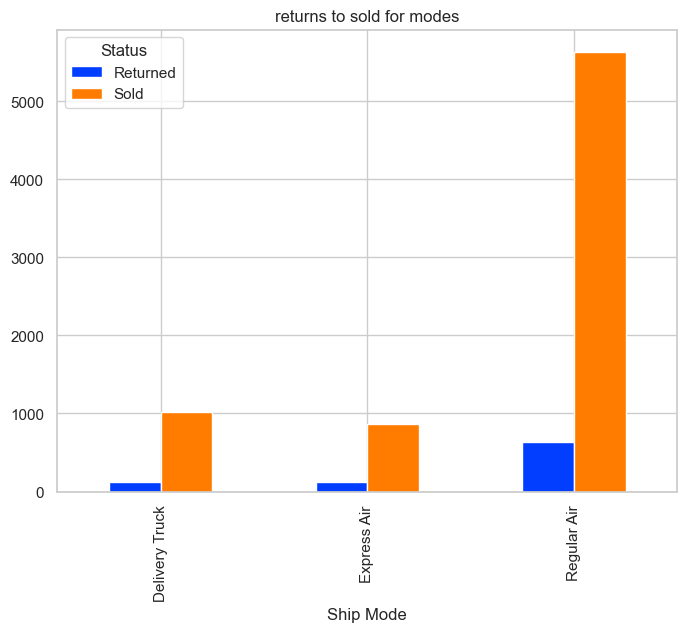

In [140]:
mode_return=superstore_sales.groupby(['Ship Mode','Status'])['Order ID'].count().unstack()
mode_return.plot(kind='bar' ,title='returns to sold for modes',figsize=(8,6))

from the first look, regular air has the largest returns but, it also has the largest sold orders.
so the calculations would involve a ratio between the returned and sold orders.

<Axes: title={'center': 'return percent of each mode'}, xlabel='Ship Mode'>

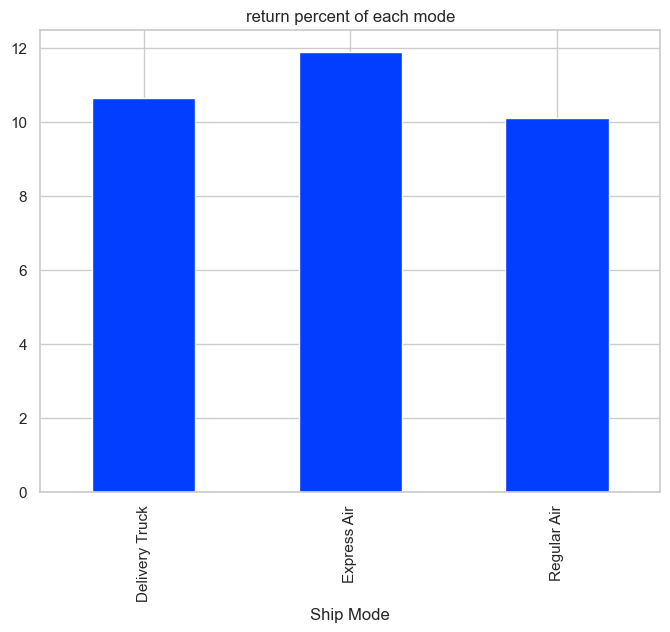

In [129]:
mode_returnavg=100*sales_return.groupby('Ship Mode')['Order ID'].count() / superstore_sales.groupby('Ship Mode')['Order ID'].count()
mode_returnavg.plot(kind='bar', title='return ratio of each mode', figsize=(8, 6))

after looking at the ratios it seems like express air has the largest ratio and regular air has the lowest

3-is the problem in a certain Category?

<Axes: title={'center': 'returns to sold for categories'}, xlabel='Product Category'>

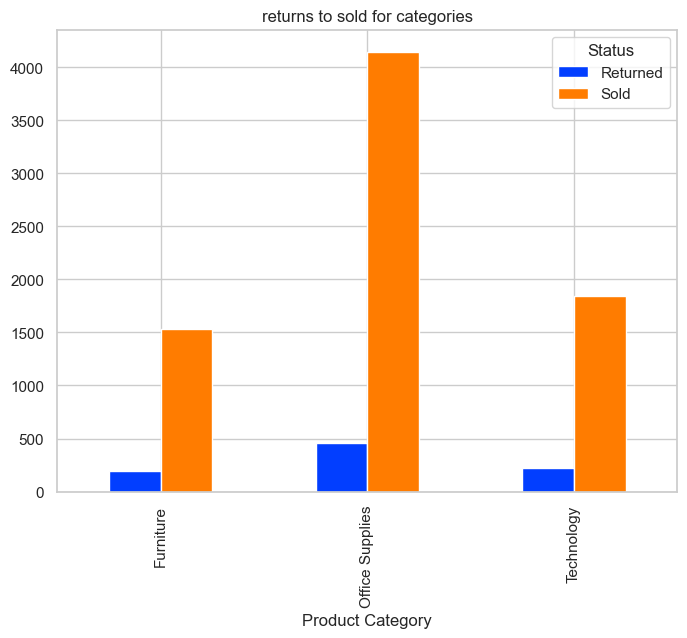

In [139]:
categ_return=superstore_sales.groupby(['Product Category','Status'])['Order ID'].count().unstack()
categ_return.plot(kind='bar' ,title='returns to sold for categories',figsize=(8,6))

<Axes: title={'center': 'return percent of each category'}, xlabel='Product Category'>

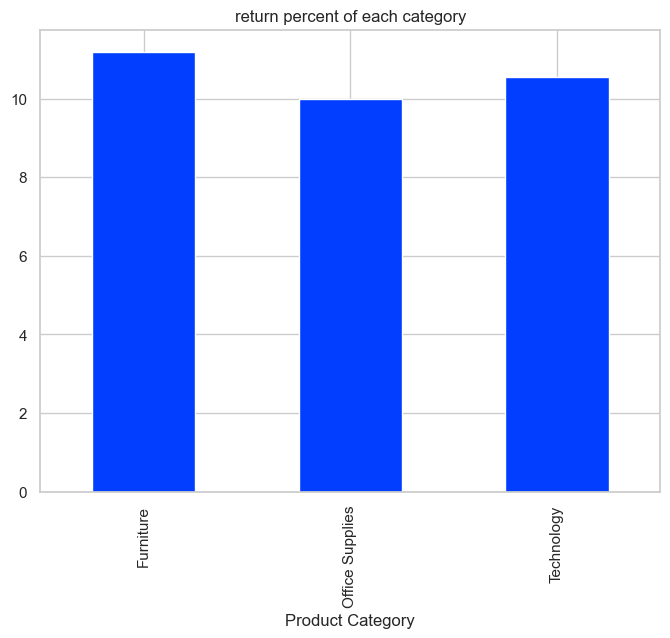

In [132]:
categ_returnavg=100*sales_return.groupby('Product Category')['Order ID'].count() / superstore_sales.groupby('Product Category')['Order ID'].count()
categ_returnavg.plot(kind='bar', title='return ratio of each category', figsize=(8, 6))

the percentages are close, no specific problem

4-is the problem in a certain SubCategory?

<Axes: title={'center': 'returns to sold for categories'}, xlabel='Product Sub-Category'>

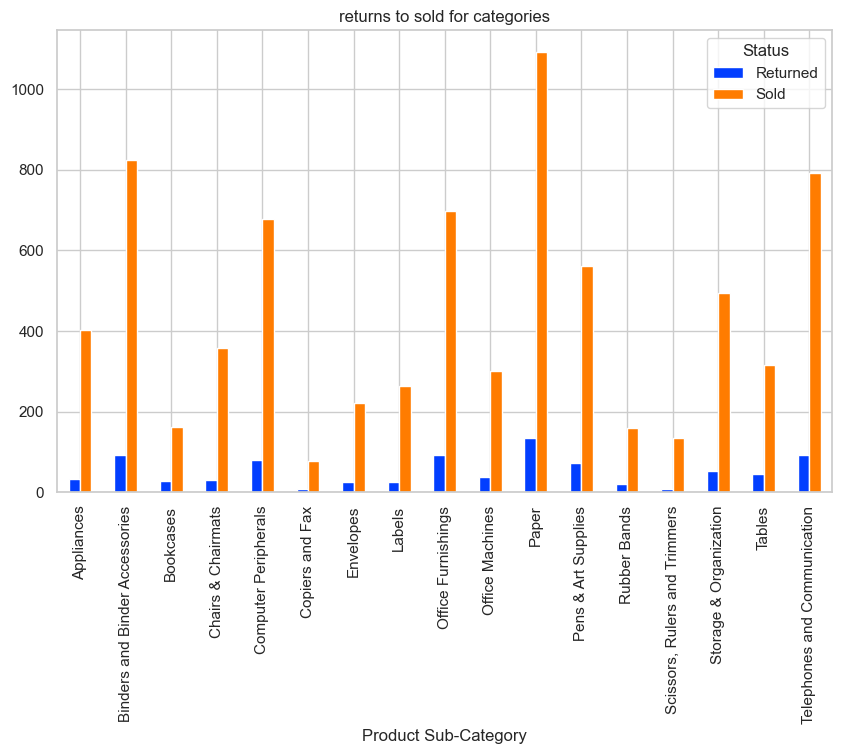

In [138]:
categ_return=superstore_sales.groupby(['Product Sub-Category','Status'])['Order ID'].count().unstack()
categ_return.plot(kind='bar' ,title='returns to sold for subcategories',figsize=(10,6))

<Axes: title={'center': 'return percent of each subcategory'}, xlabel='Product Sub-Category'>

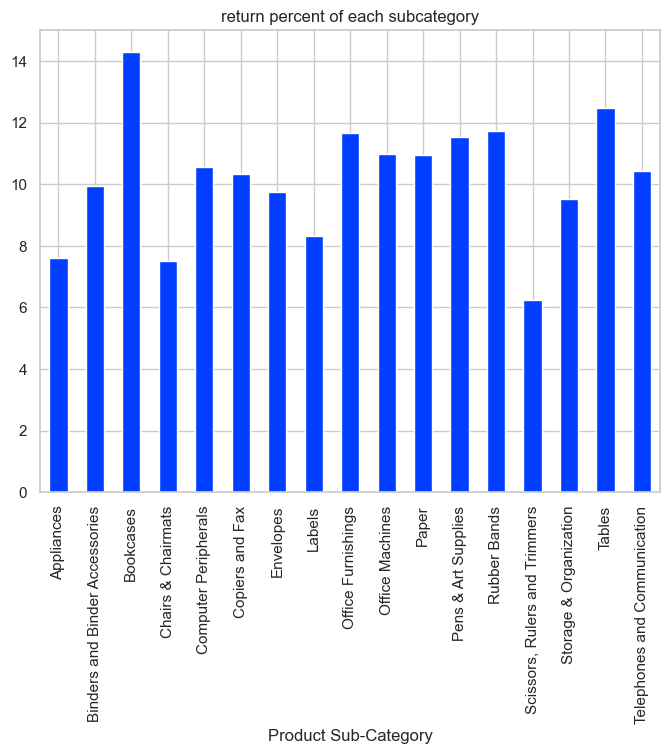

In [135]:
subcateg_return=100*sales_return.groupby('Product Sub-Category')['Order ID'].count() / superstore_sales.groupby('Product Sub-Category')['Order ID'].count()
subcateg_return.plot(kind='bar', title='return ratio of each subcategory', figsize=(8, 6))

the returns of the bookcases are more than the normal 
must find solution for it

5-what are the top Products returned?

<Axes: title={'center': 'return percent by region'}, xlabel='Product Name'>

c:\Users\elame\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 153 (\x99) missing from font(s) Arial.

c:\Users\elame\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 153 (\x99) missing from font(s) Arial.



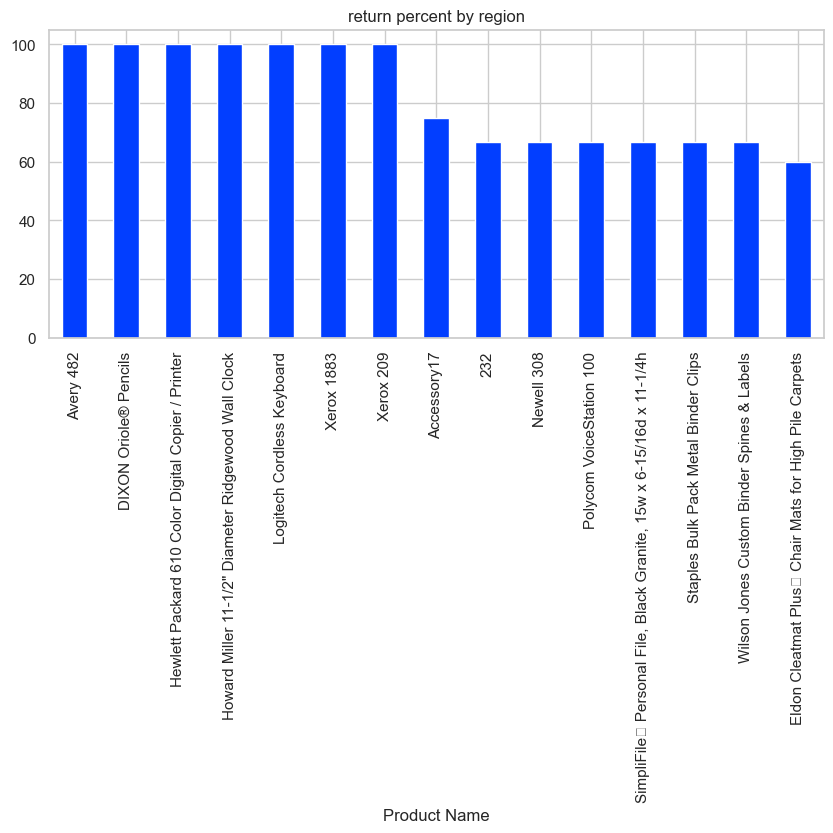

In [159]:
return_prodavg=100*sales_return.groupby('Product Name')['Order ID'].count() / superstore_sales.groupby('Product Name')['Order ID'].count()
top10_prodavg=return_prodavg.nlargest(15)
top10_prodavg.plot(kind='bar', title='largest return ratio products', figsize=(10, 4))

7 products are returned with 100% which means they haven't been sold a single item

6-is the problem in a certain Region?

<Axes: title={'center': 'return percent by region'}, xlabel='Region'>

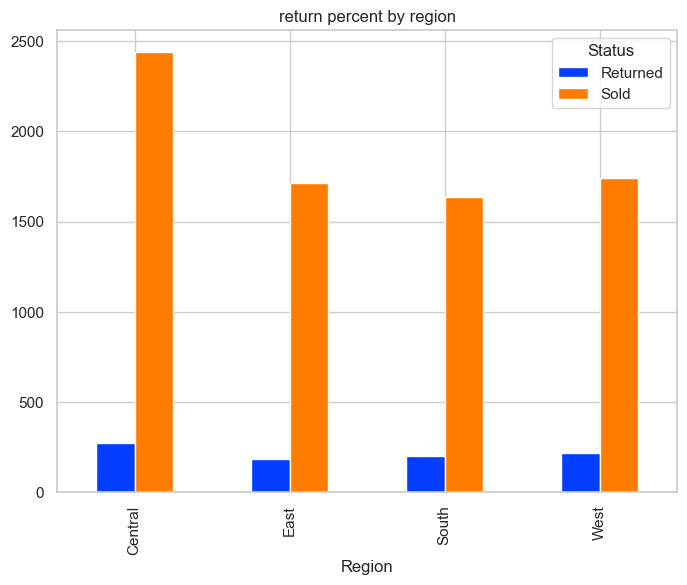

In [175]:
region_return=superstore_sales.groupby(['Region','Status'])['Order ID'].count().unstack()
region_return.plot(kind='bar', title='returns to sold for region', figsize=(8, 6))

<Axes: title={'center': 'return ratio by region'}, xlabel='Region'>

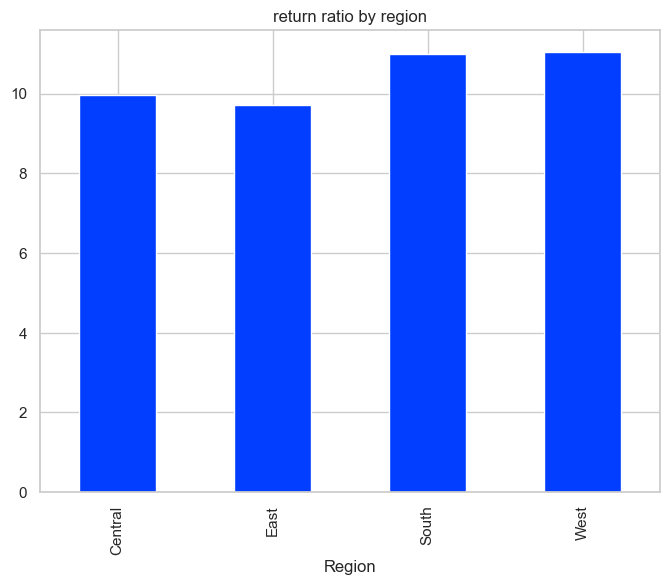

In [179]:
region_returnavg=100*sales_return.groupby('Region')['Order ID'].count() / superstore_sales.groupby('Region')['Order ID'].count()
region_returnavg.plot(kind='bar' ,title='return ratio by region', figsize=(8, 6))

the percentages are close, no specific problem

7-is the problem in a certain Customer segment?

<Axes: title={'center': 'return percent by customer segment'}, xlabel='Customer Segment'>

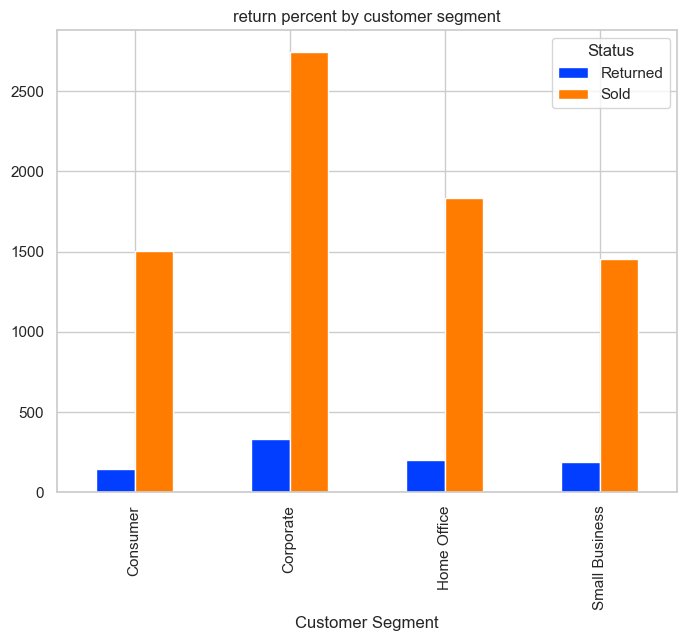

In [180]:
segment_return=superstore_sales.groupby(['Customer Segment','Status'])['Order ID'].count().unstack()
segment_return.plot(kind='bar', title='returns to sold for segments', figsize=(8, 6))

<Axes: title={'center': 'return percent by customer segment'}, xlabel='Customer Segment'>

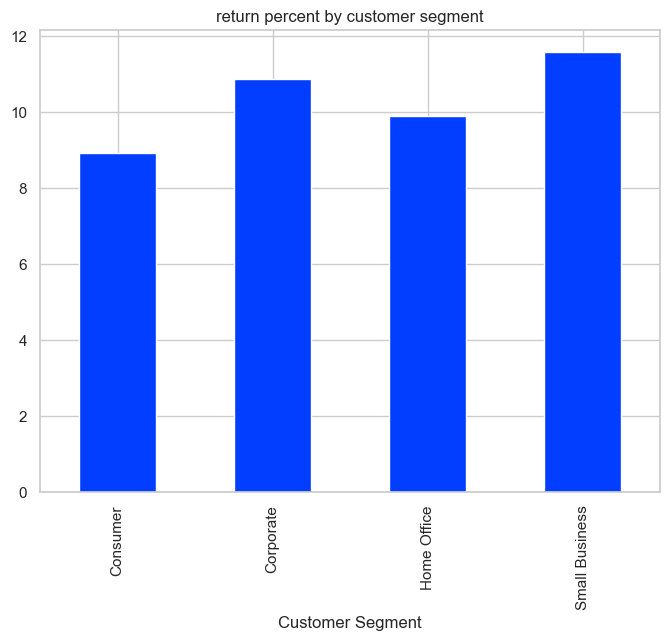

In [181]:
segment_returnavg=100*sales_return.groupby('Customer Segment')['Order ID'].count() / superstore_sales.groupby('Customer Segment')['Order ID'].count()
segment_returnavg.plot(kind='bar', title='return ratio by customer segment', figsize=(8, 6))

the difference between the largest and smallest is slightly big 
so, it is required to see if their are problems with the services of small businesses

8-who are the most customer returning orders?

<Axes: title={'center': 'return percent by region'}, xlabel='Customer Name'>

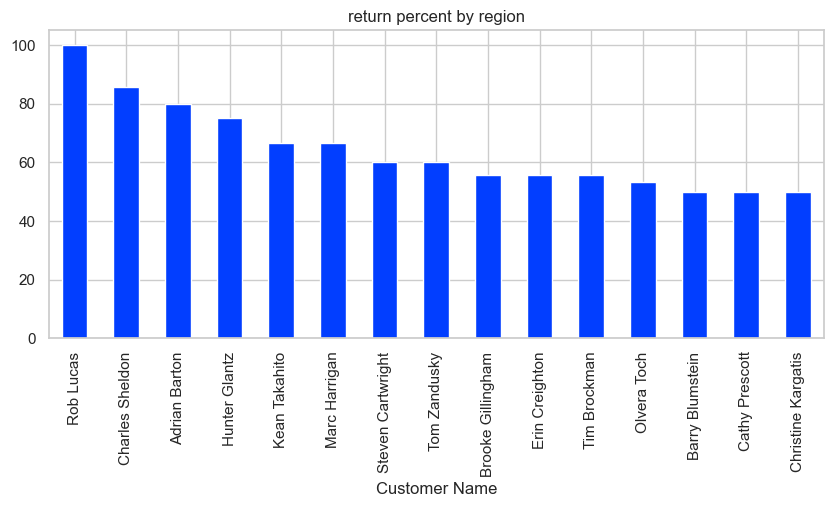

In [188]:
return_customavg=100*sales_return.groupby('Customer Name')['Order ID'].count() / superstore_sales.groupby('Customer Name')['Order ID'].count()
top10_customavg=return_customavg.nlargest(15)
top10_customavg.plot(kind='bar', title='largest return ratio customers', figsize=(10, 4))

Rob lucas is returning all the orders, we return to the service see what is the problem
for the rest in the list we can call them asking about the problems they challenge and try fixing them

9-is the problem in a certain container?

<Axes: title={'center': 'return percent by customer segment'}, xlabel='Product Container'>

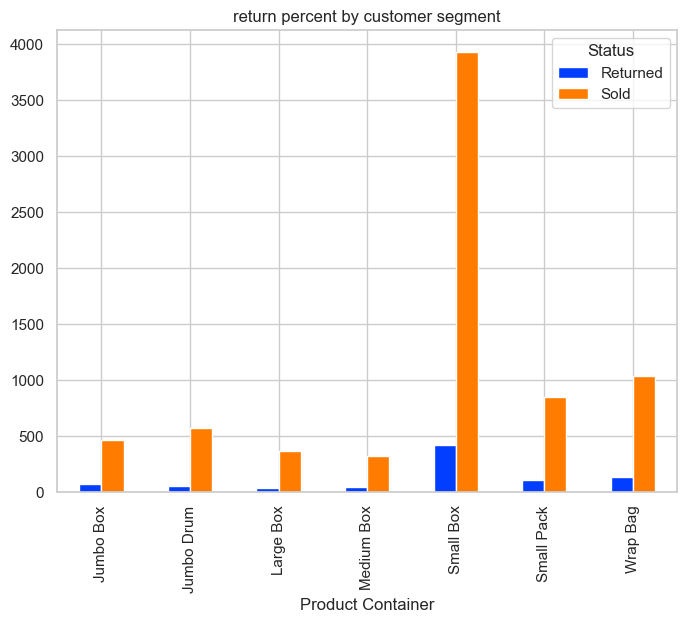

In [185]:
container_return=superstore_sales.groupby(['Product Container','Status'])['Order ID'].count().unstack()
container_return.plot(kind='bar', title='returns to sold for containers', figsize=(8, 6))

<Axes: title={'center': 'return percent by container'}, xlabel='Product Container'>

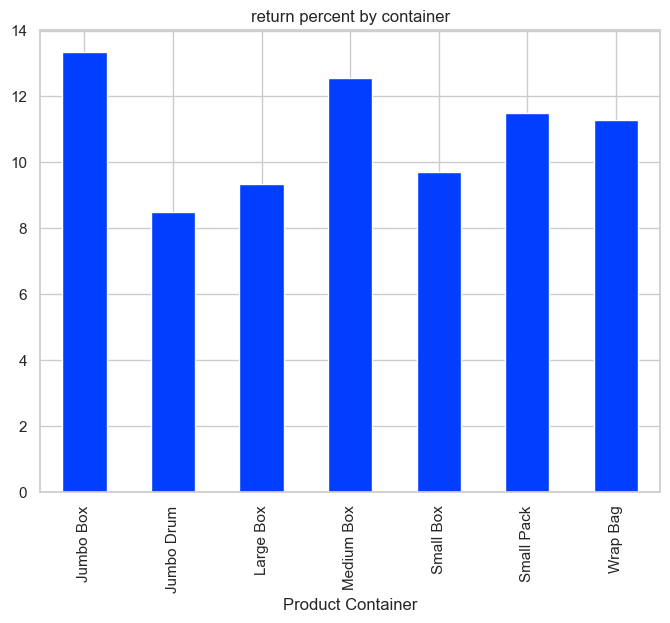

In [182]:
container_returnavg=100*sales_return.groupby('Product Container')['Order ID'].count() / superstore_sales.groupby('Product Container')['Order ID'].count()
container_returnavg.plot(kind='bar', title='return ratio by container', figsize=(8, 6))

it is clear that the nubers for the jumbo box and medium box are relatively high
it must be put under consideration

10-is the problem in a certain priority?

<Axes: title={'center': 'return percent by customer segment'}, xlabel='Order Priority'>

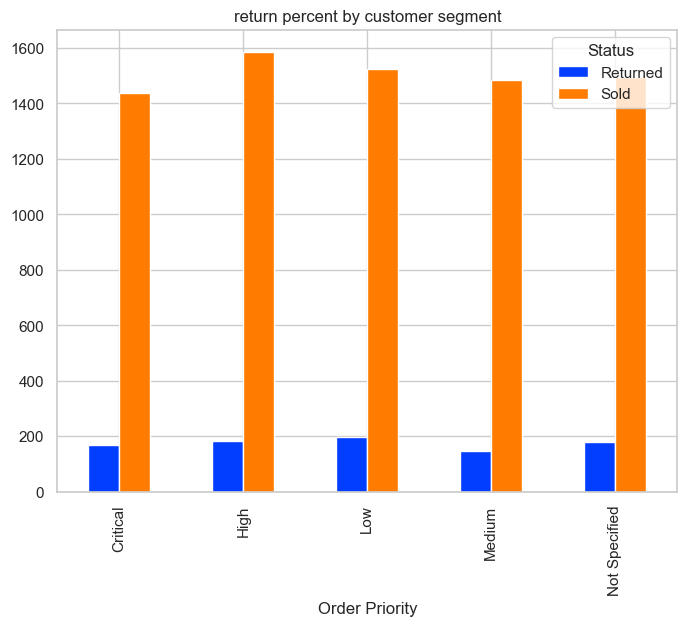

In [186]:
priority_return=superstore_sales.groupby(['Order Priority','Status'])['Order ID'].count().unstack()
priority_return.plot(kind='bar', title='returns to sold for priority', figsize=(8, 6))

<Axes: title={'center': 'return percent by priority'}, xlabel='Order Priority'>

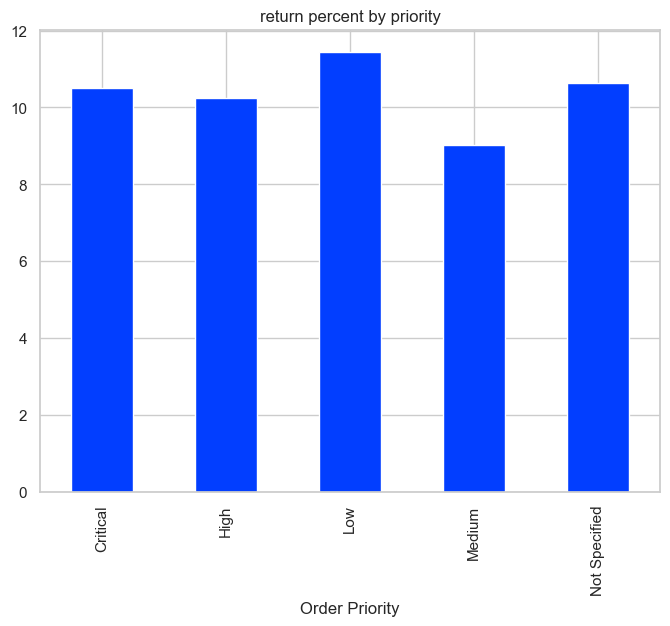

In [184]:
priority_return=100*sales_return.groupby('Order Priority')['Order ID'].count() / superstore_sales.groupby('Order Priority')['Order ID'].count()
priority_return.plot(kind='bar', title='return ratio by priority', figsize=(8, 6))

the low priority objects have the largest percent(predictable)